# Team Project 1
## DS160-01
### AUTHORS: Naat Ambrosino and Jardin Dantzler
### VERSION: 1
### SEMESTER: Spring 2022
### SUMMARY:
#### We developed this notebook to....

#### Pre-work (cleaning up dataset in general)

In [461]:
import pandas as pd
import numpy as np
import scipy.stats as stats
import pylab 
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import re

In [462]:
df=pd.read_csv('Canada_Hosp1_COVID_Data_At_Admission.csv')
dfx=pd.read_csv('Canada_Hosp1_COVID_Data_At_Admission.csv')


In [463]:
df

,id,reason_for_admission,age,sex,ethnicity,ethnicity_other,height,weight,comorbidities,comorbidities_other,...,pao2,pao2_fio2,ph,high_senstivity_cardiac_troponin,esr,inr,ferritin,d_dimer,crp,hs_crp
0,1,Fever [R50.9],74,Male,"""[]""",NaN,NaN,NaN,"""[\""Hypertension\"",\""Diabetes\"",\""Other\""]""","GERD (gastroesophageal reflux disease), Dement...",...,NaN,NaN,NaN,NaN,NaN,1.1,NaN,NaN,223.0,NaN
1,2,Pneumonia [J18.9],61,Female,"""[]""",NaN,154.9,73.6,"""[\""Hypertension\"",\""Other\""]""","Closed fracture of fifth metatarsal bone, Dive...",...,NaN,NaN,NaN,NaN,NaN,1.0,NaN,2354,95.6,NaN
2,3,Pneumonia [J18.9],58,Female,"""[]""",NaN,NaN,NaN,"""[\""Hypertension\""]""",NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4,Suspected COVID-19 virus infection [U07.2],94,Male,"""[]""",NaN,182.8,66.2,"""[\""Hypertension\"",\""Other\""]""","Parkinson's Disease, Back pain, Benign Prostat...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5,"Febrile respiratory illness [J98.9, R50.9]",91,Male,"""[]""",NaN,NaN,NaN,"""[\""Chronic cardiac disease (not hypertension)...","TAVI, Atrial fibrillation, Gastric Reflux, Pac...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
503,516,Shortness of breath [R06.0],74,Female,"""[]""",NaN,NaN,55.0,"""[\""Other\""]""","Arthritis, High cholesterol, Hypothyroidism, V...",...,NaN,NaN,NaN,NaN,NaN,1.1,NaN,NaN,NaN,NaN
504,517,COVID-19 [U07.1],81,Male,"""[]""",NaN,158.0,65.0,"""[\""Hypertension\"",\""Chronic renal\"",\""Diabete...","GERD (gastroesophageal reflux disease), High c...",...,76.0,1.5,7.44,NaN,NaN,NaN,NaN,>4000,NaN,NaN
505,519,COVID-19 [U07.1],74,Male,"""[]""",NaN,NaN,81.7,"""[\""Hypertension\"",\""Other\""]""","Dermatitis, Hyponatremia, Irritable bowel synd...",...,NaN,NaN,NaN,NaN,NaN,1.5,NaN,NaN,NaN,NaN
506,521,COVID-19 [U07.1],48,Female,"""[]""",NaN,180.0,95.3,"""[]""",NaN,...,NaN,NaN,NaN,NaN,NaN,1.0,NaN,428,NaN,NaN


In [464]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 508 entries, 0 to 507
Data columns (total 55 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   id                                508 non-null    int64  
 1   reason_for_admission              508 non-null    object 
 2   age                               508 non-null    int64  
 3   sex                               508 non-null    object 
 4   ethnicity                         508 non-null    object 
 5   ethnicity_other                   0 non-null      float64
 6   height                            272 non-null    float64
 7   weight                            358 non-null    float64
 8   comorbidities                     508 non-null    object 
 9   comorbidities_other               404 non-null    object 
 10  received_covid_vaccine            1 non-null      object 
 11  covid_vaccine                     0 non-null      float64
 12  medicati

Dropping ID as it is just a alternative index (and skips values, its intended to be used to reference a single patient across the different datasets but since we are only using the Data At Admission dataset, the ID column is obsolete), along with the columns that are empty or nearly empty (<=40 non-null values.) We will decide on other columns with much missing data later.

In [465]:
df.columns

Index(['id', 'reason_for_admission', 'age', 'sex', 'ethnicity',
       'ethnicity_other', 'height', 'weight', 'comorbidities',
       'comorbidities_other', 'received_covid_vaccine', 'covid_vaccine',
       'medications', 'smoking_history', 'year_they_quit',
       'previous_er_visit_within_14_days', 'admission_disposition',
       'systolic_blood_pressure', 'diastolic_blood_pressure', 'heart_rate',
       'respiratory_rate', 'oxygen_saturation', 'temperature', 'motor',
       'verbal', 'eye', 'intubated', 'wbc', 'rbc', 'hemoglobin', 'hematocrit',
       'mcv', 'mch', 'mchc', 'rdw', 'platelet_count', 'aptt_aptr', 'pt', 'alt',
       'ast', 'serum_creatinine', 'sodium', 'potassium',
       'total_serum_bilirubin', 'lactate', 'pao2', 'pao2_fio2', 'ph',
       'high_senstivity_cardiac_troponin', 'esr', 'inr', 'ferritin', 'd_dimer',
       'crp', 'hs_crp'],
      dtype='object')

In [466]:
df.drop(['id','ethnicity_other','received_covid_vaccine', 'covid_vaccine',
        'pao2', 'pao2_fio2', 'ph',
       'high_senstivity_cardiac_troponin', 'esr','ferritin','hs_crp'],
       axis=1, inplace=True)

In [467]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 508 entries, 0 to 507
Data columns (total 44 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   reason_for_admission              508 non-null    object 
 1   age                               508 non-null    int64  
 2   sex                               508 non-null    object 
 3   ethnicity                         508 non-null    object 
 4   height                            272 non-null    float64
 5   weight                            358 non-null    float64
 6   comorbidities                     508 non-null    object 
 7   comorbidities_other               404 non-null    object 
 8   medications                       508 non-null    object 
 9   smoking_history                   296 non-null    object 
 10  year_they_quit                    43 non-null     float64
 11  previous_er_visit_within_14_days  508 non-null    object 
 12  admissio

Noticed earlier that ethnicity seems to have a lot of (if not completely comprised of) "[]" values, and on the website there seemed to be an off value in the sex column. Going to check both of them using .groupby().count to see if we should keep ethnicity at all and whether theres a typo in sex.

In [468]:
df.ethnicity.groupby(df.ethnicity).count()

ethnicity
"[]"    508
Name: ethnicity, dtype: int64

Ethnicity column has no actual values for all intents and purposes. Dropping.

In [469]:
df.drop(['ethnicity'],axis=1,inplace=True)

In [470]:
df.sex.groupby(df.sex).count()

sex
Female    212
Male      296
Name: sex, dtype: int64

Does not appear to be a typo in sex. Good! Now checking how many columns we still have, along with their datatypes.

In [471]:
len(df.columns)

43

In [472]:
df.head()

,reason_for_admission,age,sex,height,weight,comorbidities,comorbidities_other,medications,smoking_history,year_they_quit,...,alt,ast,serum_creatinine,sodium,potassium,total_serum_bilirubin,lactate,inr,d_dimer,crp
0,Fever [R50.9],74,Male,NaN,NaN,"""[\""Hypertension\"",\""Diabetes\"",\""Other\""]""","GERD (gastroesophageal reflux disease), Dement...","""[{\""medications\"":\""TYLENOL EXTRA STRENGTH\"",...",NaN,NaN,...,53.0,49.0,165.0,135.0,3.9,10.0,2.3,1.1,NaN,223.0
1,Pneumonia [J18.9],61,Female,154.9,73.6,"""[\""Hypertension\"",\""Other\""]""","Closed fracture of fifth metatarsal bone, Dive...","""[{\""medications\"":\""CANDESARTAN\"",\""dosage\"":...",NaN,NaN,...,68.0,68.0,49.0,137.0,3.8,12.0,1.5,1.0,2354,95.6
2,Pneumonia [J18.9],58,Female,NaN,NaN,"""[\""Hypertension\""]""",NaN,"""[{\""medications\"":\""\"",\""dosage\"":\""\"",\""freq...",NaN,NaN,...,52.0,76.0,71.0,135.0,3.7,7.0,1.0,NaN,NaN,NaN
3,Suspected COVID-19 virus infection [U07.2],94,Male,182.8,66.2,"""[\""Hypertension\"",\""Other\""]""","Parkinson's Disease, Back pain, Benign Prostat...","""[{\""medications\"":\""ACETYLSALICYLIC ACID TAB...",NaN,NaN,...,6.0,24.0,146.0,135.0,2.8,10.0,4.5,NaN,NaN,NaN
4,"Febrile respiratory illness [J98.9, R50.9]",91,Male,NaN,NaN,"""[\""Chronic cardiac disease (not hypertension)...","TAVI, Atrial fibrillation, Gastric Reflux, Pac...","""[{\""medications\"":\""TRAZODONE\"",\""dosage\"":\""...",Ex-smoker,NaN,...,17.0,26.0,109.0,142.0,3.8,19.0,3.2,NaN,NaN,NaN


In [473]:
df.dtypes

reason_for_admission                 object
age                                   int64
sex                                  object
height                              float64
weight                              float64
comorbidities                        object
comorbidities_other                  object
medications                          object
smoking_history                      object
year_they_quit                      float64
previous_er_visit_within_14_days     object
admission_disposition                object
systolic_blood_pressure               int64
diastolic_blood_pressure              int64
heart_rate                            int64
respiratory_rate                      int64
oxygen_saturation                     int64
temperature                         float64
motor                               float64
verbal                              float64
eye                                 float64
intubated                            object
wbc                             

Going to get the pairwise correlation table just to see if theres anything that immmediately stands out at this stage.

In [474]:
df.corr()

,age,height,weight,year_they_quit,systolic_blood_pressure,diastolic_blood_pressure,heart_rate,respiratory_rate,oxygen_saturation,temperature,...,pt,alt,ast,serum_creatinine,sodium,potassium,total_serum_bilirubin,lactate,inr,crp
age,1.000000,-0.270279,-0.377498,-0.343756,0.069945,-0.171599,-0.347154,-0.145326,-0.030766,-0.024273,...,0.121951,-0.163725,-0.011269,0.158276,0.168237,0.186950,0.134210,0.124115,0.105539,-0.096656
height,-0.270279,1.000000,0.467210,-0.022039,0.024319,0.099043,0.141969,0.011598,0.007100,0.051773,...,0.199803,0.121294,0.101476,0.040418,-0.001297,0.140092,0.203312,0.123085,0.200931,0.103205
weight,-0.377498,0.467210,1.000000,-0.100169,-0.006880,0.079176,0.098641,0.078056,-0.087124,0.054604,...,0.028663,-0.001842,-0.028792,-0.010503,-0.059378,-0.002744,0.051082,0.042740,0.022127,0.271309
year_they_quit,-0.343756,-0.022039,-0.100169,1.000000,0.075185,0.242800,0.172657,0.157459,-0.377551,0.002955,...,-0.176305,-0.011995,0.051852,-0.046996,-0.148895,0.015586,0.104789,0.223867,-0.173659,-0.491629
systolic_blood_pressure,0.069945,0.024319,-0.006880,0.075185,1.000000,0.567449,0.126706,0.113850,0.019313,0.087001,...,-0.019106,-0.004266,0.002675,0.022953,-0.108161,0.034805,0.011347,0.041900,-0.012608,-0.005780
diastolic_blood_pressure,-0.171599,0.099043,0.079176,0.242800,0.567449,1.000000,0.288724,0.121301,0.100811,0.005300,...,-0.026929,0.043448,-0.006840,-0.044403,-0.013462,0.039455,0.025469,0.051104,-0.019948,-0.160041
heart_rate,-0.347154,0.141969,0.098641,0.172657,0.126706,0.288724,1.000000,0.281794,-0.110209,0.205067,...,-0.054262,0.104361,0.020194,-0.107036,-0.005217,-0.109494,-0.009321,0.151708,-0.051685,0.061270
respiratory_rate,-0.145326,0.011598,0.078056,0.157459,0.113850,0.121301,0.281794,1.000000,-0.292778,0.123891,...,0.004878,0.102044,0.065757,-0.046695,-0.018047,-0.065051,0.128252,0.244511,0.005740,0.398590
oxygen_saturation,-0.030766,0.007100,-0.087124,-0.377551,0.019313,0.100811,-0.110209,-0.292778,1.000000,0.032976,...,-0.057442,-0.014962,-0.075452,0.044824,0.074685,0.072773,-0.110496,-0.312522,-0.043497,-0.293848
temperature,-0.024273,0.051773,0.054604,0.002955,0.087001,0.005300,0.205067,0.123891,0.032976,1.000000,...,-0.074575,-0.013911,-0.052316,0.035265,-0.054681,-0.110988,-0.076264,-0.164282,-0.082416,-0.093513


Well, it seems like most things are very weakly correlated, but there is a correlation coefficient of .996 between inr and pt.  Theres a .8 between alt and ast.  Those might be worth looking into. Surprisingly it seems like age does not have a correlation with an absolute value more than .5, which is noteable and might be worth looking at via pair plots.

In [475]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 508 entries, 0 to 507
Data columns (total 43 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   reason_for_admission              508 non-null    object 
 1   age                               508 non-null    int64  
 2   sex                               508 non-null    object 
 3   height                            272 non-null    float64
 4   weight                            358 non-null    float64
 5   comorbidities                     508 non-null    object 
 6   comorbidities_other               404 non-null    object 
 7   medications                       508 non-null    object 
 8   smoking_history                   296 non-null    object 
 9   year_they_quit                    43 non-null     float64
 10  previous_er_visit_within_14_days  508 non-null    object 
 11  admission_disposition             508 non-null    object 
 12  systolic

I'm going to look through the of categorical variable columns and drop them if they don't seem useful, edit them if they're messy/hard to work with, or just leave them be. I'll also look through the continuous variables directly related to them, if any (ie, year_they_quit is directly related to smoking_history).  

In [476]:
df.reason_for_admission

0                                   Fever [R50.9]
1                               Pneumonia [J18.9]
2                               Pneumonia [J18.9]
3      Suspected COVID-19 virus infection [U07.2]
4      Febrile respiratory illness [J98.9, R50.9]
                          ...                    
503                   Shortness of breath [R06.0]
504                              COVID-19 [U07.1]
505                              COVID-19 [U07.1]
506                              COVID-19 [U07.1]
507                              COVID-19 [U07.1]
Name: reason_for_admission, Length: 508, dtype: object

In [477]:
df.reason_for_admission.groupby(df.reason_for_admission).count()

reason_for_admission
ARDS (adult respiratory distress syndrome) [J80]                        1
Acquired respiratory distress syndrome [J80]                            1
Atypical pneumonia [J18.9]                                              2
COVID-19 [U07.1]                                                      217
COVID-19 determined by clinical diagnostic criteria [U07.2]             1
COVID-19 virus infection [U07.1]                                        2
COVID-19 with multiple comorbidities [U07.1]                            1
Coronavirus infection [B34.2]                                           2
Cough [R05]                                                             2
Febrile respiratory illness [J98.9, R50.9]                              7
Fever [R50.9]                                                          21
Fever of unknown origin [R50.9]                                         1
Hypoxemia [R09.0]                                                       1
Hypoxia [R09.0]  

Reason for admission column has some values that are identical in meaning but use slightly different wording. For example, one observation has the value "Fever of unknown origin [R50.9]" and is thus counted seperately from the 21 observations with the entry "Fever [R50.9]". So, we decided to streamline the values so that if two values are represented by the same code(s) or combination of codes, they will be identical.

In [478]:
def streamReason(x):
    if '[J80]' in x:
        return 'Acute respiratory distress syndrome'
        #Note: After some research, I found Acquired rds and Adult rds both are alternate names for acute rds, so I used acute instead of acquired or adult.
    elif '[J18.9]' in x:
        return 'Pneumonia'
    elif '[U07.1]' in x:
        return 'COVID-19'
    elif '[U07.2]' in x:
        return 'Probable COVID-19'
    elif '[B34.2]' in x:
        return 'Coronavirus infection'
    elif '[R05]' in x:
        return 'Cough'
    elif '[J98.9, R50.9]' in x:
        return 'Febrile respiratory illness'
    elif '[R50.9]' in x:
        return 'Fever'
    elif '[R09.0]' in x:
        return 'Hypoxemia'
    elif '[M79.19]' in x:
        return 'Myalgia'
    elif '[U07.1, J12.8]' in x:
        return 'Pneumonia due to COVID-19'
    elif '[R06.0]' in x:
        return 'Shortness of breath'
    elif '[R06.0, U07.2]' in x:
        return 'Shortness of breath with exposure to COVID-19'
    elif '[R06.8]' in x:
        return 'Tachypnea'
    elif '[J12.9]' in x:
        return 'Viral pneumonia'
    elif '[J96.99]' in x:
        return 'Respiratory failure'
    elif '[J98.8]' in x:
        return 'Respiratory tract infection'
    else: 
        return x


In [479]:
#checking if the function works
streamReason('COVID-19 with multiple comorbidities [U07.1]')
#It seems to!

'COVID-19'

In [480]:
#dataframe['column to put new values in']=list(map(lambda x: functionToApply(x),dataframe['column for function to reference']))

In [481]:
df['reason_for_admission']=list(map(lambda x: streamReason(x),df['reason_for_admission']))

In [482]:
df

,reason_for_admission,age,sex,height,weight,comorbidities,comorbidities_other,medications,smoking_history,year_they_quit,...,alt,ast,serum_creatinine,sodium,potassium,total_serum_bilirubin,lactate,inr,d_dimer,crp
0,Fever,74,Male,NaN,NaN,"""[\""Hypertension\"",\""Diabetes\"",\""Other\""]""","GERD (gastroesophageal reflux disease), Dement...","""[{\""medications\"":\""TYLENOL EXTRA STRENGTH\"",...",NaN,NaN,...,53.0,49.0,165.0,135.0,3.9,10.0,2.3,1.1,NaN,223.0
1,Pneumonia,61,Female,154.9,73.6,"""[\""Hypertension\"",\""Other\""]""","Closed fracture of fifth metatarsal bone, Dive...","""[{\""medications\"":\""CANDESARTAN\"",\""dosage\"":...",NaN,NaN,...,68.0,68.0,49.0,137.0,3.8,12.0,1.5,1.0,2354,95.6
2,Pneumonia,58,Female,NaN,NaN,"""[\""Hypertension\""]""",NaN,"""[{\""medications\"":\""\"",\""dosage\"":\""\"",\""freq...",NaN,NaN,...,52.0,76.0,71.0,135.0,3.7,7.0,1.0,NaN,NaN,NaN
3,Probable COVID-19,94,Male,182.8,66.2,"""[\""Hypertension\"",\""Other\""]""","Parkinson's Disease, Back pain, Benign Prostat...","""[{\""medications\"":\""ACETYLSALICYLIC ACID TAB...",NaN,NaN,...,6.0,24.0,146.0,135.0,2.8,10.0,4.5,NaN,NaN,NaN
4,Febrile respiratory illness,91,Male,NaN,NaN,"""[\""Chronic cardiac disease (not hypertension)...","TAVI, Atrial fibrillation, Gastric Reflux, Pac...","""[{\""medications\"":\""TRAZODONE\"",\""dosage\"":\""...",Ex-smoker,NaN,...,17.0,26.0,109.0,142.0,3.8,19.0,3.2,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
503,Shortness of breath,74,Female,NaN,55.0,"""[\""Other\""]""","Arthritis, High cholesterol, Hypothyroidism, V...","""[{\""medications\"":\""TYLENOL\"",\""dosage\"":\""32...",Non-smoker,NaN,...,30.0,41.0,72.0,131.0,4.1,10.0,2.3,1.1,NaN,NaN
504,COVID-19,81,Male,158.0,65.0,"""[\""Hypertension\"",\""Chronic renal\"",\""Diabete...","GERD (gastroesophageal reflux disease), High c...","""[{\""medications\"":\""SYNTHROID\"",\""dosage\"":\""...",NaN,NaN,...,107.0,70.0,148.0,135.0,4.2,11.0,3.7,NaN,>4000,NaN
505,COVID-19,74,Male,NaN,81.7,"""[\""Hypertension\"",\""Other\""]""","Dermatitis, Hyponatremia, Irritable bowel synd...","""[{\""medications\"":\""XANAX\"",\""dosage\"":\""1\"",...",Non-smoker,NaN,...,16.0,54.0,77.0,134.0,3.8,9.0,NaN,1.5,NaN,NaN
506,COVID-19,48,Female,180.0,95.3,"""[]""",NaN,"""[]""",NaN,NaN,...,18.0,33.0,78.0,133.0,3.9,11.0,1.4,1.0,428,NaN


In [483]:
df.reason_for_admission.groupby(df.reason_for_admission).count()

reason_for_admission
Acute respiratory distress syndrome                2
COVID-19                                         220
Coronavirus infection                              2
Cough                                              2
Febrile respiratory illness                        7
Fever                                             22
Hypoxemia                                         22
Myalgia                                            1
Pneumonia                                        136
Pneumonia due to COVID-19                         41
Probable COVID-19                                  8
Respiratory failure                                7
Respiratory tract infection                        1
Shortness of breath                               34
Shortness of breath with exposure to COVID-19      1
Tachypnea                                          1
Viral pneumonia                                    1
Name: reason_for_admission, dtype: int64

In [484]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 508 entries, 0 to 507
Data columns (total 43 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   reason_for_admission              508 non-null    object 
 1   age                               508 non-null    int64  
 2   sex                               508 non-null    object 
 3   height                            272 non-null    float64
 4   weight                            358 non-null    float64
 5   comorbidities                     508 non-null    object 
 6   comorbidities_other               404 non-null    object 
 7   medications                       508 non-null    object 
 8   smoking_history                   296 non-null    object 
 9   year_they_quit                    43 non-null     float64
 10  previous_er_visit_within_14_days  508 non-null    object 
 11  admission_disposition             508 non-null    object 
 12  systolic

In [485]:
df.sex.describe()

count      508
unique       2
top       Male
freq       296
Name: sex, dtype: object

In [486]:
df.sex.groupby(df.sex).count()

sex
Female    212
Male      296
Name: sex, dtype: int64

In [487]:
df.comorbidities.groupby(df.comorbidities).count()

comorbidities
"[\"Asthma\",\"Diabetes\",\"Other\"]"                              1
"[\"Asthma\",\"Obesity\",\"Other\"]"                               1
"[\"Asthma\",\"Other\"]"                                          11
"[\"Asthma\"]"                                                     5
"[\"Cancer [active only]\",\"Diabetes\",\"Stroke\",\"Other\"]"     1
                                                                  ..
"[\"Pregnancy\"]"                                                  2
"[\"Rheumatologic disorder\",\"Hematological\",\"Other\"]"         1
"[\"Rheumatologic disorder\",\"Other\"]"                           1
"[\"Stroke\",\"Other\"]"                                           2
"[]"                                                              50
Name: comorbidities, Length: 137, dtype: int64

The comorbidities column is very messy. I'm going to remove the following characters from each string: "\[]  Once I remove them, each value should be a list of conditions with each condition seperated by a comma, instead of the mess above. I had to make replacing the quotes a seperate line because for some reason, it really didn't like a quotation mark within apostrophies as a string and kept trying to include the later lines of code as part of the badchar string.

In [488]:
def cleanComorbid(x):
    badchar="[\]"
    for char in badchar:
        x=x.replace(char,"")
    x=x.replace('"',"")
    x=x.replace(",",", ") #adding space after commas for aesthetic purposes
    return x

In [489]:
#testing function
cleanComorbid('"[\"Asthma\",\"Diabetes\",\"Other\"]"')
#seems to work!

'Asthma, Diabetes, Other'

In [490]:
df['comorbidities']=list(map(lambda x: cleanComorbid(x),df['comorbidities']))

In [491]:
df.comorbidities.groupby(df.comorbidities).count()

comorbidities
                                                50
Asthma                                           5
Asthma, Diabetes, Other                          1
Asthma, Obesity, Other                           1
Asthma, Other                                   11
                                                ..
Pregnancy                                        2
Pregnancy, Other                                 2
Rheumatologic disorder, Hematological, Other     1
Rheumatologic disorder, Other                    1
Stroke, Other                                    2
Name: comorbidities, Length: 137, dtype: int64

In [492]:
df.comorbidities.describe()

count                     508
unique                    137
top       Hypertension, Other
freq                       56
Name: comorbidities, dtype: object

In [493]:
comorbs=list(set(i for i in df.comorbidities))

In [494]:
comorbs

['',
 'Asthma, Diabetes, Other',
 'Hypertension, Chronic pulmonary (lung) disease, Diabetes, Other',
 'Hypertension, Diabetes, Rheumatologic disorder, Other',
 'Hypertension, Cancer active only, History of cancer now in remission, Other',
 'Chronic cardiac disease (not hypertension), Chronic renal, Other',
 'Asthma, Other',
 'Chronic cardiac disease (not hypertension), Hypertension, Chronic renal, Diabetes, Stroke, Other',
 'Hypertension, Asthma, Diabetes, Other',
 'Chronic cardiac disease (not hypertension), Other',
 'Chronic pulmonary (lung) disease, Diabetes, Dementia any etiology, Other',
 'Chronic cardiac disease (not hypertension), Hypertension, Chronic renal, Diabetes, Dementia any etiology, Stroke, Other',
 'Other',
 'Chronic cardiac disease (not hypertension), Cancer active only, Dementia any etiology, Other',
 'Chronic cardiac disease (not hypertension), Hypertension, Chronic pulmonary (lung) disease, History of cancer now in remission, Other',
 'Obesity, Diabetes, Other',
 '

In [495]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 508 entries, 0 to 507
Data columns (total 43 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   reason_for_admission              508 non-null    object 
 1   age                               508 non-null    int64  
 2   sex                               508 non-null    object 
 3   height                            272 non-null    float64
 4   weight                            358 non-null    float64
 5   comorbidities                     508 non-null    object 
 6   comorbidities_other               404 non-null    object 
 7   medications                       508 non-null    object 
 8   smoking_history                   296 non-null    object 
 9   year_they_quit                    43 non-null     float64
 10  previous_er_visit_within_14_days  508 non-null    object 
 11  admission_disposition             508 non-null    object 
 12  systolic

Notice above that the comorbidities column has 50 null values, but pandas is not recognizing them as such. Going to make a function to fix that.

In [496]:
def emptyToNull(x):
    if x=="":
        return None
    else:
        return x

In [497]:
df['comorbidities']=list(map(lambda x: emptyToNull(x),df['comorbidities']))

In [498]:
df.comorbidities.groupby(df.comorbidities).count()

comorbidities
Asthma                                           5
Asthma, Diabetes, Other                          1
Asthma, Obesity, Other                           1
Asthma, Other                                   11
Cancer active only                               1
                                                ..
Pregnancy                                        2
Pregnancy, Other                                 2
Rheumatologic disorder, Hematological, Other     1
Rheumatologic disorder, Other                    1
Stroke, Other                                    2
Name: comorbidities, Length: 136, dtype: int64

In [499]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 508 entries, 0 to 507
Data columns (total 43 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   reason_for_admission              508 non-null    object 
 1   age                               508 non-null    int64  
 2   sex                               508 non-null    object 
 3   height                            272 non-null    float64
 4   weight                            358 non-null    float64
 5   comorbidities                     458 non-null    object 
 6   comorbidities_other               404 non-null    object 
 7   medications                       508 non-null    object 
 8   smoking_history                   296 non-null    object 
 9   year_they_quit                    43 non-null     float64
 10  previous_er_visit_within_14_days  508 non-null    object 
 11  admission_disposition             508 non-null    object 
 12  systolic

Fixed it. Now I'm going to check that if the comorbidity value of an observation is null, then the comorbidities_other value is also null for that observation.

In [500]:
df

,reason_for_admission,age,sex,height,weight,comorbidities,comorbidities_other,medications,smoking_history,year_they_quit,...,alt,ast,serum_creatinine,sodium,potassium,total_serum_bilirubin,lactate,inr,d_dimer,crp
0,Fever,74,Male,NaN,NaN,"Hypertension, Diabetes, Other","GERD (gastroesophageal reflux disease), Dement...","""[{\""medications\"":\""TYLENOL EXTRA STRENGTH\"",...",NaN,NaN,...,53.0,49.0,165.0,135.0,3.9,10.0,2.3,1.1,NaN,223.0
1,Pneumonia,61,Female,154.9,73.6,"Hypertension, Other","Closed fracture of fifth metatarsal bone, Dive...","""[{\""medications\"":\""CANDESARTAN\"",\""dosage\"":...",NaN,NaN,...,68.0,68.0,49.0,137.0,3.8,12.0,1.5,1.0,2354,95.6
2,Pneumonia,58,Female,NaN,NaN,Hypertension,NaN,"""[{\""medications\"":\""\"",\""dosage\"":\""\"",\""freq...",NaN,NaN,...,52.0,76.0,71.0,135.0,3.7,7.0,1.0,NaN,NaN,NaN
3,Probable COVID-19,94,Male,182.8,66.2,"Hypertension, Other","Parkinson's Disease, Back pain, Benign Prostat...","""[{\""medications\"":\""ACETYLSALICYLIC ACID TAB...",NaN,NaN,...,6.0,24.0,146.0,135.0,2.8,10.0,4.5,NaN,NaN,NaN
4,Febrile respiratory illness,91,Male,NaN,NaN,"Chronic cardiac disease (not hypertension), Hy...","TAVI, Atrial fibrillation, Gastric Reflux, Pac...","""[{\""medications\"":\""TRAZODONE\"",\""dosage\"":\""...",Ex-smoker,NaN,...,17.0,26.0,109.0,142.0,3.8,19.0,3.2,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
503,Shortness of breath,74,Female,NaN,55.0,Other,"Arthritis, High cholesterol, Hypothyroidism, V...","""[{\""medications\"":\""TYLENOL\"",\""dosage\"":\""32...",Non-smoker,NaN,...,30.0,41.0,72.0,131.0,4.1,10.0,2.3,1.1,NaN,NaN
504,COVID-19,81,Male,158.0,65.0,"Hypertension, Chronic renal, Diabetes, Other","GERD (gastroesophageal reflux disease), High c...","""[{\""medications\"":\""SYNTHROID\"",\""dosage\"":\""...",NaN,NaN,...,107.0,70.0,148.0,135.0,4.2,11.0,3.7,NaN,>4000,NaN
505,COVID-19,74,Male,NaN,81.7,"Hypertension, Other","Dermatitis, Hyponatremia, Irritable bowel synd...","""[{\""medications\"":\""XANAX\"",\""dosage\"":\""1\"",...",Non-smoker,NaN,...,16.0,54.0,77.0,134.0,3.8,9.0,NaN,1.5,NaN,NaN
506,COVID-19,48,Female,180.0,95.3,None,NaN,"""[]""",NaN,NaN,...,18.0,33.0,78.0,133.0,3.9,11.0,1.4,1.0,428,NaN


In [501]:
dfC=df.drop(['reason_for_admission', 'age', 'sex', 'height', 'weight',
        'medications',
       'smoking_history', 'year_they_quit', 'previous_er_visit_within_14_days',
       'admission_disposition', 'systolic_blood_pressure',
       'diastolic_blood_pressure', 'heart_rate', 'respiratory_rate',
       'oxygen_saturation', 'temperature', 'motor', 'verbal', 'eye',
       'intubated', 'wbc', 'rbc', 'hemoglobin', 'hematocrit', 'mcv', 'mch',
       'mchc', 'rdw', 'platelet_count', 'aptt_aptr', 'pt', 'alt', 'ast',
       'serum_creatinine', 'sodium', 'potassium', 'total_serum_bilirubin',
       'lactate', 'inr', 'd_dimer', 'crp'],axis=1)
dfC=dfC[dfC.comorbidities.isna()]

In [502]:
dfC

,comorbidities,comorbidities_other
6,None,NaN
10,None,NaN
20,None,NaN
21,None,NaN
22,None,NaN
37,None,NaN
43,None,NaN
53,None,NaN
61,None,NaN
64,None,NaN


Great, time to move onn to looking at the rest of the categorical variables.

In [503]:
df.comorbidities_other.groupby(df.comorbidities_other).count()

comorbidities_other
\tAcquired absence of uterus with remaining cervical stump, Atrioventricular block, Basal cell carcinoma, Cataract, Goiter, nontoxic, multinodular, Hx of varicose veins of lower extremity, Malignant neoplasm of breast, Osteoporosis, Rheumatic disorder of both mitral and aortic valves, Squamous cell carcinoma of skin, UTI (urinary tract infection)\t                                                                                                                            1
\tGERD (gastroesophageal reflux disease), High cholesterol, MI (myocardial infarction) Anterior STEMI 2016 - PCI with DES to LAD                                                                                                                                                                                                                                                                                                                                                          1
1.\tPeripheral arterial dise

Cleaning this one up would be awful. Going to leave it there for now and drop it later.

In [504]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 508 entries, 0 to 507
Data columns (total 43 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   reason_for_admission              508 non-null    object 
 1   age                               508 non-null    int64  
 2   sex                               508 non-null    object 
 3   height                            272 non-null    float64
 4   weight                            358 non-null    float64
 5   comorbidities                     458 non-null    object 
 6   comorbidities_other               404 non-null    object 
 7   medications                       508 non-null    object 
 8   smoking_history                   296 non-null    object 
 9   year_they_quit                    43 non-null     float64
 10  previous_er_visit_within_14_days  508 non-null    object 
 11  admission_disposition             508 non-null    object 
 12  systolic

In [505]:
df.medications.groupby(df.medications).count()

medications
"[]"                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                        

This one is so messy I can barely tell whats going on at all. I'm going to run it through the a modified version of cleanComorb function to make it a little bit nicer-- I think I'll add open and closed curly brackets to the badchar string, as those seem to be unneccessary. Then we'll see what else is wrong with this variable.

In [506]:
def cleanMed(x):
    badchar="{[}\]"
    for char in badchar:
        x=x.replace(char,"")
    x=x.replace('"',"")
    #x=x.replace(",",", ") #adding space after commas for aesthetic purposes
    return x

In [507]:
df['medications']=list(map(lambda x: cleanMed(x),df['medications']))

In [508]:
df.medications.groupby(df.medications).count()

medications
                                                                                                                                                                                                                                                                                                                          10
medications:,dosage:,frequency:OD                                                                                                                                                                                                                                                                                          3
medications:,dosage:,frequency:Please Select an option                                                                                                                                                                                                                                                                    58
medications:,dosage:,frequency:null  

On the first run through of cleaning this dataset, I got rid of the nulls of medicine and then (after much difficulty) got the column's values to be just the names of the medications each patient takes, alphabetized and without repeated medication in a given row. However, that still left medicine with over 400 unique values, and very little that we could do with it. So, I am going to drop it now. See the version of this notebook pushed at around 6:00 PM EST on 3/12/22 (the push titled Update March 12 Naat or something along those lines) for the cleaned version of this column.

In [509]:
df.drop(['medications'],axis=1,inplace=True)

In [510]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 508 entries, 0 to 507
Data columns (total 42 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   reason_for_admission              508 non-null    object 
 1   age                               508 non-null    int64  
 2   sex                               508 non-null    object 
 3   height                            272 non-null    float64
 4   weight                            358 non-null    float64
 5   comorbidities                     458 non-null    object 
 6   comorbidities_other               404 non-null    object 
 7   smoking_history                   296 non-null    object 
 8   year_they_quit                    43 non-null     float64
 9   previous_er_visit_within_14_days  508 non-null    object 
 10  admission_disposition             508 non-null    object 
 11  systolic_blood_pressure           508 non-null    int64  
 12  diastoli

In [511]:
df.smoking_history

0             NaN
1             NaN
2             NaN
3             NaN
4       Ex-smoker
          ...    
503    Non-smoker
504           NaN
505    Non-smoker
506           NaN
507           NaN
Name: smoking_history, Length: 508, dtype: object

In [512]:
df.smoking_history.groupby(df.smoking_history).count()

smoking_history
Ex-smoker                      66
Non-smoker                    218
Smoker: < 30 pack years         1
Smoker: pack years unknown     11
Name: smoking_history, dtype: int64

There is only one value for <30 pack years smoker, and the rest of the values for smokers are Smoker: pack years unknown. I'm going to combine those two values into a single value.

In [513]:
def combSmoke(x):
    if type(x)==str:
        if 'years' in x:
            return 'Smoker'
        else:
            return x
    else:
        return x
df['smoking_history']=list(map(lambda x: combSmoke(x),df.smoking_history))

In [514]:
df.smoking_history.groupby(df.smoking_history).count()

smoking_history
Ex-smoker      66
Non-smoker    218
Smoker         12
Name: smoking_history, dtype: int64

Now to look at  "year_they_quit". From df.info, we know that it only has 43 values, which means not every Ex-smoker has an entry. 

In [515]:
df.year_they_quit.describe()

count      43.000000
mean     1999.744186
std        15.433564
min      1971.000000
25%      1990.000000
50%      2000.000000
75%      2013.500000
max      2021.000000
Name: year_they_quit, dtype: float64

In [516]:
df.year_they_quit.groupby(df.year_they_quit).count()

year_they_quit
1971.0    3
1975.0    1
1980.0    3
1984.0    1
1986.0    2
1990.0    3
1991.0    2
1995.0    1
1996.0    1
1998.0    3
2000.0    2
2001.0    3
2005.0    2
2006.0    1
2009.0    1
2010.0    2
2011.0    1
2016.0    2
2017.0    1
2019.0    2
2020.0    4
2021.0    2
Name: year_they_quit, dtype: int64

In [517]:
df['year_they_quit'] = df['year_they_quit'].fillna(0).astype(int)
print(df.dtypes)

reason_for_admission                 object
age                                   int64
sex                                  object
height                              float64
weight                              float64
comorbidities                        object
comorbidities_other                  object
smoking_history                      object
year_they_quit                        int32
previous_er_visit_within_14_days     object
admission_disposition                object
systolic_blood_pressure               int64
diastolic_blood_pressure              int64
heart_rate                            int64
respiratory_rate                      int64
oxygen_saturation                     int64
temperature                         float64
motor                               float64
verbal                              float64
eye                                 float64
intubated                            object
wbc                                 float64
rbc                             

In [518]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 508 entries, 0 to 507
Data columns (total 42 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   reason_for_admission              508 non-null    object 
 1   age                               508 non-null    int64  
 2   sex                               508 non-null    object 
 3   height                            272 non-null    float64
 4   weight                            358 non-null    float64
 5   comorbidities                     458 non-null    object 
 6   comorbidities_other               404 non-null    object 
 7   smoking_history                   296 non-null    object 
 8   year_they_quit                    508 non-null    int32  
 9   previous_er_visit_within_14_days  508 non-null    object 
 10  admission_disposition             508 non-null    object 
 11  systolic_blood_pressure           508 non-null    int64  
 12  diastoli

Now to convert the numbers to integers as a whole.

In [519]:
def toInt(x):
    return int(x)

In [520]:
df['year_they_quit']=list(map(lambda x: toInt(x),df['year_they_quit']))

In [521]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 508 entries, 0 to 507
Data columns (total 42 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   reason_for_admission              508 non-null    object 
 1   age                               508 non-null    int64  
 2   sex                               508 non-null    object 
 3   height                            272 non-null    float64
 4   weight                            358 non-null    float64
 5   comorbidities                     458 non-null    object 
 6   comorbidities_other               404 non-null    object 
 7   smoking_history                   296 non-null    object 
 8   year_they_quit                    508 non-null    int64  
 9   previous_er_visit_within_14_days  508 non-null    object 
 10  admission_disposition             508 non-null    object 
 11  systolic_blood_pressure           508 non-null    int64  
 12  diastoli

And now to get rid of the 0s and make those null.

In [522]:
def zeroToN(x):
    if x!=0:
        return int(x)

In [523]:
df['year_they_quit']=list(map(lambda x: zeroToN(x),df['year_they_quit']))

In [524]:
df.year_they_quit.groupby(df.year_they_quit).count()

year_they_quit
1971.0    3
1975.0    1
1980.0    3
1984.0    1
1986.0    2
1990.0    3
1991.0    2
1995.0    1
1996.0    1
1998.0    3
2000.0    2
2001.0    3
2005.0    2
2006.0    1
2009.0    1
2010.0    2
2011.0    1
2016.0    2
2017.0    1
2019.0    2
2020.0    4
2021.0    2
Name: year_they_quit, dtype: int64

In [525]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 508 entries, 0 to 507
Data columns (total 42 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   reason_for_admission              508 non-null    object 
 1   age                               508 non-null    int64  
 2   sex                               508 non-null    object 
 3   height                            272 non-null    float64
 4   weight                            358 non-null    float64
 5   comorbidities                     458 non-null    object 
 6   comorbidities_other               404 non-null    object 
 7   smoking_history                   296 non-null    object 
 8   year_they_quit                    43 non-null     float64
 9   previous_er_visit_within_14_days  508 non-null    object 
 10  admission_disposition             508 non-null    object 
 11  systolic_blood_pressure           508 non-null    int64  
 12  diastoli

Looks okay. May go back later to change it to how many years before 2021 they quit. It's a bit annoying that I can't fix the data type.

In [526]:
df.previous_er_visit_within_14_days.describe()

count     508
unique      2
top        No
freq      401
Name: previous_er_visit_within_14_days, dtype: object

In [527]:
df.previous_er_visit_within_14_days.groupby(df.previous_er_visit_within_14_days).count()

previous_er_visit_within_14_days
No     401
Yes    107
Name: previous_er_visit_within_14_days, dtype: int64

In [528]:
df.admission_disposition.groupby(df.admission_disposition).count() 

admission_disposition
ICU      43
WARD    465
Name: admission_disposition, dtype: int64

In [529]:
df.intubated.groupby(df.intubated).count()

intubated
No     493
Yes     15
Name: intubated, dtype: int64

Admission disposition and Intubated seem mostly useless, so I may drop them later. Previous ER Visit also may be dropped.

In [530]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 508 entries, 0 to 507
Data columns (total 42 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   reason_for_admission              508 non-null    object 
 1   age                               508 non-null    int64  
 2   sex                               508 non-null    object 
 3   height                            272 non-null    float64
 4   weight                            358 non-null    float64
 5   comorbidities                     458 non-null    object 
 6   comorbidities_other               404 non-null    object 
 7   smoking_history                   296 non-null    object 
 8   year_they_quit                    43 non-null     float64
 9   previous_er_visit_within_14_days  508 non-null    object 
 10  admission_disposition             508 non-null    object 
 11  systolic_blood_pressure           508 non-null    int64  
 12  diastoli

In [531]:
df.aptt_aptr

0       44
1       28
2      NaN
3      NaN
4      NaN
      ... 
503     28
504     31
505     30
506     31
507     28
Name: aptt_aptr, Length: 508, dtype: object

I'm unsure what this column is, or why the values are objects instead of integers. I'll go ahead and drop it.

In [532]:
df.drop(['aptt_aptr'],inplace=True,axis=1)

In [533]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 508 entries, 0 to 507
Data columns (total 41 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   reason_for_admission              508 non-null    object 
 1   age                               508 non-null    int64  
 2   sex                               508 non-null    object 
 3   height                            272 non-null    float64
 4   weight                            358 non-null    float64
 5   comorbidities                     458 non-null    object 
 6   comorbidities_other               404 non-null    object 
 7   smoking_history                   296 non-null    object 
 8   year_they_quit                    43 non-null     float64
 9   previous_er_visit_within_14_days  508 non-null    object 
 10  admission_disposition             508 non-null    object 
 11  systolic_blood_pressure           508 non-null    int64  
 12  diastoli

In [534]:
df.columns

Index(['reason_for_admission', 'age', 'sex', 'height', 'weight',
       'comorbidities', 'comorbidities_other', 'smoking_history',
       'year_they_quit', 'previous_er_visit_within_14_days',
       'admission_disposition', 'systolic_blood_pressure',
       'diastolic_blood_pressure', 'heart_rate', 'respiratory_rate',
       'oxygen_saturation', 'temperature', 'motor', 'verbal', 'eye',
       'intubated', 'wbc', 'rbc', 'hemoglobin', 'hematocrit', 'mcv', 'mch',
       'mchc', 'rdw', 'platelet_count', 'pt', 'alt', 'ast', 'serum_creatinine',
       'sodium', 'potassium', 'total_serum_bilirubin', 'lactate', 'inr',
       'd_dimer', 'crp'],
      dtype='object')

In [535]:
newNames=['reason', 'age', 'sex', 'height', 'weight',
       'comorb', 'comorbid_other',
       'smoke_hist', 'year_quit', 'er_2_weeks',
       'admission_disposition', 'systolic_bp',
       'diastolic_bp', 'heart_rate', 'respiratory_rate',
       'oxygen_sat', 'temp', 'motor', 'verbal', 'eye',
       'intubated', 'wbc', 'rbc', 'hemoglobin', 'hematocrit', 'mcv', 'mch',
       'mchc', 'rdw', 'platelet_count', 'pt', 'alt', 'ast', 'serum_creatinine',
       'sodium', 'potassium', 'total_serum_bilirubin', 'lactate', 'inr',
       'd_dimer', 'crp']

In [536]:
df.columns=newNames

In [537]:
df

,reason,age,sex,height,weight,comorb,comorbid_other,smoke_hist,year_quit,er_2_weeks,...,alt,ast,serum_creatinine,sodium,potassium,total_serum_bilirubin,lactate,inr,d_dimer,crp
0,Fever,74,Male,NaN,NaN,"Hypertension, Diabetes, Other","GERD (gastroesophageal reflux disease), Dement...",NaN,NaN,No,...,53.0,49.0,165.0,135.0,3.9,10.0,2.3,1.1,NaN,223.0
1,Pneumonia,61,Female,154.9,73.6,"Hypertension, Other","Closed fracture of fifth metatarsal bone, Dive...",NaN,NaN,No,...,68.0,68.0,49.0,137.0,3.8,12.0,1.5,1.0,2354,95.6
2,Pneumonia,58,Female,NaN,NaN,Hypertension,NaN,NaN,NaN,No,...,52.0,76.0,71.0,135.0,3.7,7.0,1.0,NaN,NaN,NaN
3,Probable COVID-19,94,Male,182.8,66.2,"Hypertension, Other","Parkinson's Disease, Back pain, Benign Prostat...",NaN,NaN,No,...,6.0,24.0,146.0,135.0,2.8,10.0,4.5,NaN,NaN,NaN
4,Febrile respiratory illness,91,Male,NaN,NaN,"Chronic cardiac disease (not hypertension), Hy...","TAVI, Atrial fibrillation, Gastric Reflux, Pac...",Ex-smoker,NaN,No,...,17.0,26.0,109.0,142.0,3.8,19.0,3.2,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
503,Shortness of breath,74,Female,NaN,55.0,Other,"Arthritis, High cholesterol, Hypothyroidism, V...",Non-smoker,NaN,Yes,...,30.0,41.0,72.0,131.0,4.1,10.0,2.3,1.1,NaN,NaN
504,COVID-19,81,Male,158.0,65.0,"Hypertension, Chronic renal, Diabetes, Other","GERD (gastroesophageal reflux disease), High c...",NaN,NaN,Yes,...,107.0,70.0,148.0,135.0,4.2,11.0,3.7,NaN,>4000,NaN
505,COVID-19,74,Male,NaN,81.7,"Hypertension, Other","Dermatitis, Hyponatremia, Irritable bowel synd...",Non-smoker,NaN,Yes,...,16.0,54.0,77.0,134.0,3.8,9.0,NaN,1.5,NaN,NaN
506,COVID-19,48,Female,180.0,95.3,None,NaN,NaN,NaN,Yes,...,18.0,33.0,78.0,133.0,3.9,11.0,1.4,1.0,428,NaN


Decided to drop comorbid_other as it has too much varying data in there and would be difficult to sort through. If needed, will use the index of a patient to look up whether they had anything in the other column using dfx, the original dataset.

In [538]:
df.drop(['comorbid_other'], inplace=True,axis=1)

In [539]:
df

,reason,age,sex,height,weight,comorb,smoke_hist,year_quit,er_2_weeks,admission_disposition,...,alt,ast,serum_creatinine,sodium,potassium,total_serum_bilirubin,lactate,inr,d_dimer,crp
0,Fever,74,Male,NaN,NaN,"Hypertension, Diabetes, Other",NaN,NaN,No,WARD,...,53.0,49.0,165.0,135.0,3.9,10.0,2.3,1.1,NaN,223.0
1,Pneumonia,61,Female,154.9,73.6,"Hypertension, Other",NaN,NaN,No,WARD,...,68.0,68.0,49.0,137.0,3.8,12.0,1.5,1.0,2354,95.6
2,Pneumonia,58,Female,NaN,NaN,Hypertension,NaN,NaN,No,WARD,...,52.0,76.0,71.0,135.0,3.7,7.0,1.0,NaN,NaN,NaN
3,Probable COVID-19,94,Male,182.8,66.2,"Hypertension, Other",NaN,NaN,No,WARD,...,6.0,24.0,146.0,135.0,2.8,10.0,4.5,NaN,NaN,NaN
4,Febrile respiratory illness,91,Male,NaN,NaN,"Chronic cardiac disease (not hypertension), Hy...",Ex-smoker,NaN,No,WARD,...,17.0,26.0,109.0,142.0,3.8,19.0,3.2,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
503,Shortness of breath,74,Female,NaN,55.0,Other,Non-smoker,NaN,Yes,WARD,...,30.0,41.0,72.0,131.0,4.1,10.0,2.3,1.1,NaN,NaN
504,COVID-19,81,Male,158.0,65.0,"Hypertension, Chronic renal, Diabetes, Other",NaN,NaN,Yes,WARD,...,107.0,70.0,148.0,135.0,4.2,11.0,3.7,NaN,>4000,NaN
505,COVID-19,74,Male,NaN,81.7,"Hypertension, Other",Non-smoker,NaN,Yes,WARD,...,16.0,54.0,77.0,134.0,3.8,9.0,NaN,1.5,NaN,NaN
506,COVID-19,48,Female,180.0,95.3,None,NaN,NaN,Yes,WARD,...,18.0,33.0,78.0,133.0,3.9,11.0,1.4,1.0,428,NaN


In [540]:
df.comorb.groupby(df.comorb).count()

comorb
Asthma                                           5
Asthma, Diabetes, Other                          1
Asthma, Obesity, Other                           1
Asthma, Other                                   11
Cancer active only                               1
                                                ..
Pregnancy                                        2
Pregnancy, Other                                 2
Rheumatologic disorder, Hematological, Other     1
Rheumatologic disorder, Other                    1
Stroke, Other                                    2
Name: comorb, Length: 136, dtype: int64

Want to also get rid of all those Others in the comorb column. Error given when try to run ridOther function while nulls were in comorb column, so temporarily replaced each null with HELLO and added some code to get rid of the HELLO values in the ridOther function.

In [541]:
df.columns

Index(['reason', 'age', 'sex', 'height', 'weight', 'comorb', 'smoke_hist',
       'year_quit', 'er_2_weeks', 'admission_disposition', 'systolic_bp',
       'diastolic_bp', 'heart_rate', 'respiratory_rate', 'oxygen_sat', 'temp',
       'motor', 'verbal', 'eye', 'intubated', 'wbc', 'rbc', 'hemoglobin',
       'hematocrit', 'mcv', 'mch', 'mchc', 'rdw', 'platelet_count', 'pt',
       'alt', 'ast', 'serum_creatinine', 'sodium', 'potassium',
       'total_serum_bilirubin', 'lactate', 'inr', 'd_dimer', 'crp'],
      dtype='object')

In [542]:
dfC=df.drop([ 'age', 'sex', 'height', 'weight',
       'smoke_hist', 'year_quit', 'er_2_weeks', 'admission_disposition',
       'systolic_bp', 'diastolic_bp', 'heart_rate', 'respiratory_rate',
       'oxygen_sat', 'temp', 'motor', 'verbal', 'eye', 'intubated', 'wbc',
       'rbc', 'hemoglobin', 'hematocrit', 'mcv', 'mch', 'mchc', 'rdw',
       'platelet_count', 'pt', 'alt', 'ast', 'serum_creatinine', 'sodium',
       'potassium', 'total_serum_bilirubin', 'lactate', 'inr', 'd_dimer',
       'crp'],axis=1)

In [543]:
dfC

,reason,comorb
0,Fever,"Hypertension, Diabetes, Other"
1,Pneumonia,"Hypertension, Other"
2,Pneumonia,Hypertension
3,Probable COVID-19,"Hypertension, Other"
4,Febrile respiratory illness,"Chronic cardiac disease (not hypertension), Hy..."
...,...,...
503,Shortness of breath,Other
504,COVID-19,"Hypertension, Chronic renal, Diabetes, Other"
505,COVID-19,"Hypertension, Other"
506,COVID-19,None


In [544]:
dfC.fillna("HELLO",axis=1,inplace=True)

In [545]:
dfC

,reason,comorb
0,Fever,"Hypertension, Diabetes, Other"
1,Pneumonia,"Hypertension, Other"
2,Pneumonia,Hypertension
3,Probable COVID-19,"Hypertension, Other"
4,Febrile respiratory illness,"Chronic cardiac disease (not hypertension), Hy..."
...,...,...
503,Shortness of breath,Other
504,COVID-19,"Hypertension, Chronic renal, Diabetes, Other"
505,COVID-19,"Hypertension, Other"
506,COVID-19,HELLO


In [546]:
df.comorb=dfC.comorb

In [547]:
df

,reason,age,sex,height,weight,comorb,smoke_hist,year_quit,er_2_weeks,admission_disposition,...,alt,ast,serum_creatinine,sodium,potassium,total_serum_bilirubin,lactate,inr,d_dimer,crp
0,Fever,74,Male,NaN,NaN,"Hypertension, Diabetes, Other",NaN,NaN,No,WARD,...,53.0,49.0,165.0,135.0,3.9,10.0,2.3,1.1,NaN,223.0
1,Pneumonia,61,Female,154.9,73.6,"Hypertension, Other",NaN,NaN,No,WARD,...,68.0,68.0,49.0,137.0,3.8,12.0,1.5,1.0,2354,95.6
2,Pneumonia,58,Female,NaN,NaN,Hypertension,NaN,NaN,No,WARD,...,52.0,76.0,71.0,135.0,3.7,7.0,1.0,NaN,NaN,NaN
3,Probable COVID-19,94,Male,182.8,66.2,"Hypertension, Other",NaN,NaN,No,WARD,...,6.0,24.0,146.0,135.0,2.8,10.0,4.5,NaN,NaN,NaN
4,Febrile respiratory illness,91,Male,NaN,NaN,"Chronic cardiac disease (not hypertension), Hy...",Ex-smoker,NaN,No,WARD,...,17.0,26.0,109.0,142.0,3.8,19.0,3.2,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
503,Shortness of breath,74,Female,NaN,55.0,Other,Non-smoker,NaN,Yes,WARD,...,30.0,41.0,72.0,131.0,4.1,10.0,2.3,1.1,NaN,NaN
504,COVID-19,81,Male,158.0,65.0,"Hypertension, Chronic renal, Diabetes, Other",NaN,NaN,Yes,WARD,...,107.0,70.0,148.0,135.0,4.2,11.0,3.7,NaN,>4000,NaN
505,COVID-19,74,Male,NaN,81.7,"Hypertension, Other",Non-smoker,NaN,Yes,WARD,...,16.0,54.0,77.0,134.0,3.8,9.0,NaN,1.5,NaN,NaN
506,COVID-19,48,Female,180.0,95.3,HELLO,NaN,NaN,Yes,WARD,...,18.0,33.0,78.0,133.0,3.9,11.0,1.4,1.0,428,NaN


In [548]:
def ridOther(x):
    if x=="Other":
        return None
    elif x=="HELLO":
        return None
    else:
        if ", Other" in x:
            x=x.replace(", Other","")
        elif "Other" in x:
            x='ERROR IN RIDOTHER FUNCTION'
        else:
            x=x
        return x

In [549]:
df['comorb']=list(map(lambda x: ridOther(x),df['comorb']))

In [550]:
df

,reason,age,sex,height,weight,comorb,smoke_hist,year_quit,er_2_weeks,admission_disposition,...,alt,ast,serum_creatinine,sodium,potassium,total_serum_bilirubin,lactate,inr,d_dimer,crp
0,Fever,74,Male,NaN,NaN,"Hypertension, Diabetes",NaN,NaN,No,WARD,...,53.0,49.0,165.0,135.0,3.9,10.0,2.3,1.1,NaN,223.0
1,Pneumonia,61,Female,154.9,73.6,Hypertension,NaN,NaN,No,WARD,...,68.0,68.0,49.0,137.0,3.8,12.0,1.5,1.0,2354,95.6
2,Pneumonia,58,Female,NaN,NaN,Hypertension,NaN,NaN,No,WARD,...,52.0,76.0,71.0,135.0,3.7,7.0,1.0,NaN,NaN,NaN
3,Probable COVID-19,94,Male,182.8,66.2,Hypertension,NaN,NaN,No,WARD,...,6.0,24.0,146.0,135.0,2.8,10.0,4.5,NaN,NaN,NaN
4,Febrile respiratory illness,91,Male,NaN,NaN,"Chronic cardiac disease (not hypertension), Hy...",Ex-smoker,NaN,No,WARD,...,17.0,26.0,109.0,142.0,3.8,19.0,3.2,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
503,Shortness of breath,74,Female,NaN,55.0,None,Non-smoker,NaN,Yes,WARD,...,30.0,41.0,72.0,131.0,4.1,10.0,2.3,1.1,NaN,NaN
504,COVID-19,81,Male,158.0,65.0,"Hypertension, Chronic renal, Diabetes",NaN,NaN,Yes,WARD,...,107.0,70.0,148.0,135.0,4.2,11.0,3.7,NaN,>4000,NaN
505,COVID-19,74,Male,NaN,81.7,Hypertension,Non-smoker,NaN,Yes,WARD,...,16.0,54.0,77.0,134.0,3.8,9.0,NaN,1.5,NaN,NaN
506,COVID-19,48,Female,180.0,95.3,None,NaN,NaN,Yes,WARD,...,18.0,33.0,78.0,133.0,3.9,11.0,1.4,1.0,428,NaN


In [551]:
df.comorb.groupby(df.comorb).count()

comorb
Asthma                                   16
Asthma, Diabetes                          1
Asthma, Obesity                           1
Cancer active only                        4
Cancer active only, Diabetes, Stroke      1
                                         ..
Obesity, Diabetes                         1
Pregnancy                                 4
Rheumatologic disorder                    1
Rheumatologic disorder, Hematological     1
Stroke                                    2
Name: comorb, Length: 121, dtype: int64

Going to ensure that comorb's entries are alphabetized.

In [552]:
df.comorb.groupby(df.comorb).count()

comorb
Asthma                                   16
Asthma, Diabetes                          1
Asthma, Obesity                           1
Cancer active only                        4
Cancer active only, Diabetes, Stroke      1
                                         ..
Obesity, Diabetes                         1
Pregnancy                                 4
Rheumatologic disorder                    1
Rheumatologic disorder, Hematological     1
Stroke                                    2
Name: comorb, Length: 121, dtype: int64

In [553]:
def removeSpaceAftComma(x):
    if type(x)==str:
        return re.sub(', ', ',', x)
    else:
        return x
a='Cancer active only, Diabetes, Stroke'
removeSpaceAftComma(a)

'Cancer active only,Diabetes,Stroke'

In [554]:
df['comorb']=list(map(lambda x: removeSpaceAftComma(x),df['comorb']))
df.comorb.groupby(df.comorb).count()

comorb
Asthma                                  16
Asthma,Diabetes                          1
Asthma,Obesity                           1
Cancer active only                       4
Cancer active only,Diabetes,Stroke       1
                                        ..
Obesity,Diabetes                         1
Pregnancy                                4
Rheumatologic disorder                   1
Rheumatologic disorder,Hematological     1
Stroke                                   2
Name: comorb, Length: 121, dtype: int64

In [555]:
def alphabetizeX(x):
    delim=','
    if type(x)==str:
        res=delim.join(sorted(list(set(x.split(',')))))
        return res
    else:
        return x

In [556]:
df['comorb']=list(map(lambda x: alphabetizeX(x),df['comorb']))

In [557]:
df.comorb.groupby(df.comorb).count()

comorb
Asthma                                                                                                              16
Asthma,Cancer active only,Chronic renal,Diabetes,Hypertension                                                        1
Asthma,Chronic cardiac disease (not hypertension),Chronic pulmonary (lung) disease,Diabetes,Hypertension,Obesity     1
Asthma,Chronic cardiac disease (not hypertension),Chronic renal,Diabetes,Hypertension                                1
Asthma,Chronic cardiac disease (not hypertension),Dementia any etiology,Diabetes,Hypertension,Obesity                1
                                                                                                                    ..
Kidney disease,Obesity                                                                                               1
Obesity                                                                                                              5
Pregnancy                                

In [558]:
df

,reason,age,sex,height,weight,comorb,smoke_hist,year_quit,er_2_weeks,admission_disposition,...,alt,ast,serum_creatinine,sodium,potassium,total_serum_bilirubin,lactate,inr,d_dimer,crp
0,Fever,74,Male,NaN,NaN,"Diabetes,Hypertension",NaN,NaN,No,WARD,...,53.0,49.0,165.0,135.0,3.9,10.0,2.3,1.1,NaN,223.0
1,Pneumonia,61,Female,154.9,73.6,Hypertension,NaN,NaN,No,WARD,...,68.0,68.0,49.0,137.0,3.8,12.0,1.5,1.0,2354,95.6
2,Pneumonia,58,Female,NaN,NaN,Hypertension,NaN,NaN,No,WARD,...,52.0,76.0,71.0,135.0,3.7,7.0,1.0,NaN,NaN,NaN
3,Probable COVID-19,94,Male,182.8,66.2,Hypertension,NaN,NaN,No,WARD,...,6.0,24.0,146.0,135.0,2.8,10.0,4.5,NaN,NaN,NaN
4,Febrile respiratory illness,91,Male,NaN,NaN,"Chronic cardiac disease (not hypertension),Dia...",Ex-smoker,NaN,No,WARD,...,17.0,26.0,109.0,142.0,3.8,19.0,3.2,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
503,Shortness of breath,74,Female,NaN,55.0,None,Non-smoker,NaN,Yes,WARD,...,30.0,41.0,72.0,131.0,4.1,10.0,2.3,1.1,NaN,NaN
504,COVID-19,81,Male,158.0,65.0,"Chronic renal,Diabetes,Hypertension",NaN,NaN,Yes,WARD,...,107.0,70.0,148.0,135.0,4.2,11.0,3.7,NaN,>4000,NaN
505,COVID-19,74,Male,NaN,81.7,Hypertension,Non-smoker,NaN,Yes,WARD,...,16.0,54.0,77.0,134.0,3.8,9.0,NaN,1.5,NaN,NaN
506,COVID-19,48,Female,180.0,95.3,None,NaN,NaN,Yes,WARD,...,18.0,33.0,78.0,133.0,3.9,11.0,1.4,1.0,428,NaN


Did some more checking around and found out that motor, verbal, and eye are actually nominal variables that have been mapped to numbers, with 1 referring to the first option from a drop down, 2 referring to the second option from a drop down, etc. Going to make those values strings to avoid confusion. 

In [559]:
df.columns

Index(['reason', 'age', 'sex', 'height', 'weight', 'comorb', 'smoke_hist',
       'year_quit', 'er_2_weeks', 'admission_disposition', 'systolic_bp',
       'diastolic_bp', 'heart_rate', 'respiratory_rate', 'oxygen_sat', 'temp',
       'motor', 'verbal', 'eye', 'intubated', 'wbc', 'rbc', 'hemoglobin',
       'hematocrit', 'mcv', 'mch', 'mchc', 'rdw', 'platelet_count', 'pt',
       'alt', 'ast', 'serum_creatinine', 'sodium', 'potassium',
       'total_serum_bilirubin', 'lactate', 'inr', 'd_dimer', 'crp'],
      dtype='object')

In [560]:
df.motor.groupby(df.motor).count()

motor
1.0      2
2.0      1
3.0      2
4.0      2
5.0     20
6.0    479
Name: motor, dtype: int64

In [561]:
df.verbal.groupby(df.verbal).count()

verbal
1.0      9
2.0     10
3.0      2
4.0     47
5.0    438
Name: verbal, dtype: int64

In [562]:
df.eye.groupby(df.eye).count()

eye
1.0      3
2.0      3
3.0     13
4.0    487
Name: eye, dtype: int64

In [563]:
a="test"
b=a[0:1]
b

't'

In [564]:
dfC=df.drop(['reason', 'age', 'sex', 'height', 'weight', 'comorb',
       'smoke_hist', 'year_quit', 'er_2_weeks', 'admission_disposition',
       'systolic_bp', 'diastolic_bp', 'heart_rate', 'respiratory_rate',
       'oxygen_sat', 'temp', 'intubated', 'wbc',
       'rbc', 'hemoglobin', 'hematocrit', 'mcv', 'mch', 'mchc', 'rdw',
       'platelet_count', 'pt', 'alt', 'ast', 'serum_creatinine', 'sodium',
       'potassium', 'total_serum_bilirubin', 'lactate', 'inr', 'd_dimer',
       'crp'],axis=1)

In [565]:
dfC.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 508 entries, 0 to 507
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   motor   506 non-null    float64
 1   verbal  506 non-null    float64
 2   eye     506 non-null    float64
dtypes: float64(3)
memory usage: 12.0 KB


In [566]:
dfC.fillna(0.0,axis=1,inplace=True)

In [567]:
dfC.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 508 entries, 0 to 507
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   motor   508 non-null    float64
 1   verbal  508 non-null    float64
 2   eye     508 non-null    float64
dtypes: float64(3)
memory usage: 12.0 KB


In [568]:
def mveToStr(x):
    a=str(x)
    b=a[0:1]
    if b=='0':
        return None
    else:
        return b

In [569]:
mveToStr(0.0)

In [570]:
df['motor']=list(map(lambda x: mveToStr(x),dfC['motor']))
df['eye']=list(map(lambda x: mveToStr(x),dfC['eye']))
df['verbal']=list(map(lambda x: mveToStr(x),dfC['verbal']))

In [571]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 508 entries, 0 to 507
Data columns (total 40 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   reason                 508 non-null    object 
 1   age                    508 non-null    int64  
 2   sex                    508 non-null    object 
 3   height                 272 non-null    float64
 4   weight                 358 non-null    float64
 5   comorb                 403 non-null    object 
 6   smoke_hist             296 non-null    object 
 7   year_quit              43 non-null     float64
 8   er_2_weeks             508 non-null    object 
 9   admission_disposition  508 non-null    object 
 10  systolic_bp            508 non-null    int64  
 11  diastolic_bp           508 non-null    int64  
 12  heart_rate             508 non-null    int64  
 13  respiratory_rate       508 non-null    int64  
 14  oxygen_sat             508 non-null    int64  
 15  temp  

In [572]:
comorbs=set(x for x in df.comorb)
comorbs

{'Asthma',
 'Asthma,Cancer active only,Chronic renal,Diabetes,Hypertension',
 'Asthma,Chronic cardiac disease (not hypertension),Chronic pulmonary (lung) disease,Diabetes,Hypertension,Obesity',
 'Asthma,Chronic cardiac disease (not hypertension),Chronic renal,Diabetes,Hypertension',
 'Asthma,Chronic cardiac disease (not hypertension),Dementia any etiology,Diabetes,Hypertension,Obesity',
 'Asthma,Chronic cardiac disease (not hypertension),Dementia any etiology,Stroke',
 'Asthma,Chronic cardiac disease (not hypertension),Hypertension,Stroke',
 'Asthma,Chronic cardiac disease (not hypertension),Obesity',
 'Asthma,Chronic pulmonary (lung) disease',
 'Asthma,Chronic pulmonary (lung) disease,Dementia any etiology,Diabetes,Hypertension,Obesity',
 'Asthma,Chronic pulmonary (lung) disease,Diabetes,Hypertension',
 'Asthma,Chronic pulmonary (lung) disease,Hypertension',
 'Asthma,Dementia any etiology,Hypertension',
 'Asthma,Diabetes',
 'Asthma,Diabetes,Hypertension',
 'Asthma,Diabetes,Hypertensio

There is way too much going on in comorb. Going to filter down the amount of information in comorb to just whether the patient has: diabetes, a chronic cardiac disease (hypertension or otherwise), chronic pulmonary disease, or asthma.

In [573]:
def contains_word(s, w):
    return (',' + w + ',') in (',' + s + ',')
def focusComorb(x):
    String=""
    a='Asthma'
    b='Chronic cardiac disease (not hypertension)'
    c='Chronic pulmonary (lung) disease'
    d='Hypertension'
    e='Diabetes'
    if type(x)==str:
        if contains_word(x,a):
            String=String+"Asthma, "
        if contains_word(x,b) or contains_word(x,d):
            String=String+"Chronic cardiac disease, "
        if contains_word(x,c):
            String=String+'Chronic pulmonary disease, '
        if contains_word(x,e):
            String=String+'Diabetes, '
        return String[0:-2]
    else:
        return x

In [574]:
df['comorb']=list(map(lambda x: focusComorb(x),df['comorb']))


In [575]:
df.comorb.groupby(df.comorb).count()

comorb
                                                                         24
Asthma                                                                   17
Asthma, Chronic cardiac disease                                          19
Asthma, Chronic cardiac disease, Chronic pulmonary disease                1
Asthma, Chronic cardiac disease, Chronic pulmonary disease, Diabetes      3
Asthma, Chronic cardiac disease, Diabetes                                12
Asthma, Chronic pulmonary disease                                         1
Asthma, Diabetes                                                          1
Chronic cardiac disease                                                 152
Chronic cardiac disease, Chronic pulmonary disease                        9
Chronic cardiac disease, Chronic pulmonary disease, Diabetes              7
Chronic cardiac disease, Diabetes                                       125
Chronic pulmonary disease                                                 5
Chron

In [576]:
df['comorb']=list(map(lambda x: emptyToNull(x),df['comorb']))

In [577]:
df.comorb.groupby(df.comorb).count()

comorb
Asthma                                                                   17
Asthma, Chronic cardiac disease                                          19
Asthma, Chronic cardiac disease, Chronic pulmonary disease                1
Asthma, Chronic cardiac disease, Chronic pulmonary disease, Diabetes      3
Asthma, Chronic cardiac disease, Diabetes                                12
Asthma, Chronic pulmonary disease                                         1
Asthma, Diabetes                                                          1
Chronic cardiac disease                                                 152
Chronic cardiac disease, Chronic pulmonary disease                        9
Chronic cardiac disease, Chronic pulmonary disease, Diabetes              7
Chronic cardiac disease, Diabetes                                       125
Chronic pulmonary disease                                                 5
Chronic pulmonary disease, Diabetes                                       2
Diabe

In [578]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 508 entries, 0 to 507
Data columns (total 40 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   reason                 508 non-null    object 
 1   age                    508 non-null    int64  
 2   sex                    508 non-null    object 
 3   height                 272 non-null    float64
 4   weight                 358 non-null    float64
 5   comorb                 379 non-null    object 
 6   smoke_hist             296 non-null    object 
 7   year_quit              43 non-null     float64
 8   er_2_weeks             508 non-null    object 
 9   admission_disposition  508 non-null    object 
 10  systolic_bp            508 non-null    int64  
 11  diastolic_bp           508 non-null    int64  
 12  heart_rate             508 non-null    int64  
 13  respiratory_rate       508 non-null    int64  
 14  oxygen_sat             508 non-null    int64  
 15  temp  

d_dimer should be integer, not object. Going to fix.

In [579]:
df.d_dimer.groupby(df.d_dimer).count()

d_dimer
1010     1
1013     1
1023     1
1029     1
1032     1
        ..
993      1
994      2
996      1
<270     2
>4000    6
Name: d_dimer, Length: 213, dtype: int64

I don't know what the true values for <270 and >4000 were before they were written as that. Going to set those values to 269 and 4001 respectively, to be conservative but not throw out the values entirely.

In [580]:
def fixDimer1(x):
    if type(x)==str:
        if x=="<270":
            return '269'
        elif x=='>4000':
            return '4001'
        else:
            return x
    else:
        return x
def fixDimer2(x):
    if type(x)==str:
        return int(x)
    else:
        return x

In [581]:
df['d_dimer']=list(map(lambda x: fixDimer1(x),df['d_dimer']))
df['d_dimer']=list(map(lambda x: fixDimer2(x),df['d_dimer']))

In [582]:
df.d_dimer.groupby(df.d_dimer).count()

d_dimer
269.0     2
277.0     1
285.0     1
313.0     1
322.0     2
         ..
3324.0    1
3620.0    1
3705.0    1
3750.0    1
4001.0    6
Name: d_dimer, Length: 213, dtype: int64

### Work for Part II and III.

In [583]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 508 entries, 0 to 507
Data columns (total 40 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   reason                 508 non-null    object 
 1   age                    508 non-null    int64  
 2   sex                    508 non-null    object 
 3   height                 272 non-null    float64
 4   weight                 358 non-null    float64
 5   comorb                 379 non-null    object 
 6   smoke_hist             296 non-null    object 
 7   year_quit              43 non-null     float64
 8   er_2_weeks             508 non-null    object 
 9   admission_disposition  508 non-null    object 
 10  systolic_bp            508 non-null    int64  
 11  diastolic_bp           508 non-null    int64  
 12  heart_rate             508 non-null    int64  
 13  respiratory_rate       508 non-null    int64  
 14  oxygen_sat             508 non-null    int64  
 15  temp  

In [584]:
(1-(142/508))*100 #Here was just me doing math to find the percent of missing data for each one.

72.04724409448819

In [585]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,508.0,66.027559,16.394160,19.00,55.7500,66.000,78.00,100.000
height,272.0,166.911029,10.961776,125.00,159.0000,167.600,175.00,198.000
weight,358.0,80.265922,21.810799,27.70,65.8000,76.700,89.80,199.600
year_quit,43.0,1999.744186,15.433564,1971.00,1990.0000,2000.000,2013.50,2021.000
systolic_bp,508.0,129.362205,22.051194,85.00,115.0000,127.000,143.00,227.000
diastolic_bp,508.0,75.566929,12.851352,22.00,68.0000,75.000,83.00,145.000
heart_rate,508.0,97.397638,17.513347,41.00,86.0000,98.000,109.00,161.000
respiratory_rate,508.0,24.901575,7.170656,12.00,20.0000,24.000,28.00,59.000
oxygen_sat,508.0,93.100394,6.102006,47.00,92.0000,94.000,96.00,100.000
temp,508.0,37.768110,0.963806,35.50,37.0000,37.700,38.50,40.500


In [586]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 508 entries, 0 to 507
Data columns (total 40 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   reason                 508 non-null    object 
 1   age                    508 non-null    int64  
 2   sex                    508 non-null    object 
 3   height                 272 non-null    float64
 4   weight                 358 non-null    float64
 5   comorb                 379 non-null    object 
 6   smoke_hist             296 non-null    object 
 7   year_quit              43 non-null     float64
 8   er_2_weeks             508 non-null    object 
 9   admission_disposition  508 non-null    object 
 10  systolic_bp            508 non-null    int64  
 11  diastolic_bp           508 non-null    int64  
 12  heart_rate             508 non-null    int64  
 13  respiratory_rate       508 non-null    int64  
 14  oxygen_sat             508 non-null    int64  
 15  temp  

Now to create the Table 3s, the proportion tables for the categorical variables. First I make a dataframe with just the categorical variables so I do not have to worry about errors happening due to attempting to make a table of that kind with a continuous variable. Then, I am going to make a function that will output a dataframe similar to the table I will have to make, given a column and a dataframe.

In [587]:
df.columns

Index(['reason', 'age', 'sex', 'height', 'weight', 'comorb', 'smoke_hist',
       'year_quit', 'er_2_weeks', 'admission_disposition', 'systolic_bp',
       'diastolic_bp', 'heart_rate', 'respiratory_rate', 'oxygen_sat', 'temp',
       'motor', 'verbal', 'eye', 'intubated', 'wbc', 'rbc', 'hemoglobin',
       'hematocrit', 'mcv', 'mch', 'mchc', 'rdw', 'platelet_count', 'pt',
       'alt', 'ast', 'serum_creatinine', 'sodium', 'potassium',
       'total_serum_bilirubin', 'lactate', 'inr', 'd_dimer', 'crp'],
      dtype='object')

In [588]:
dfCat=df.drop(['age', 'height', 'weight',
       'year_quit', 'systolic_bp',
       'diastolic_bp', 'heart_rate', 'respiratory_rate', 'oxygen_sat', 'temp',
       'wbc', 'rbc', 'hemoglobin',
       'hematocrit', 'mcv', 'mch', 'mchc', 'rdw', 'platelet_count', 'pt',
       'alt', 'ast', 'serum_creatinine', 'sodium', 'potassium',
       'total_serum_bilirubin', 'lactate', 'inr', 'd_dimer', 'crp'], axis=1)

In [589]:
dfCat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 508 entries, 0 to 507
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   reason                 508 non-null    object
 1   sex                    508 non-null    object
 2   comorb                 379 non-null    object
 3   smoke_hist             296 non-null    object
 4   er_2_weeks             508 non-null    object
 5   admission_disposition  508 non-null    object
 6   motor                  506 non-null    object
 7   verbal                 506 non-null    object
 8   eye                    506 non-null    object
 9   intubated              508 non-null    object
dtypes: object(10)
memory usage: 39.8+ KB


To make the function, first I will do one column by hand, then clean up and recreate the steps I took to define the function. I'll do the smoke_hist column first, since it has null values and not too many unique values.

In [590]:
len(dfCat.smoke_hist) #testing

508

In [591]:
dfCat.smoke_hist.count() #combine with final step, testing

296

len(dataframe.column) apparently counts nulls (and some other testing showed that happens even when using len(dataframe.column.notna())), while dataframe.column.count() does not. Good to know.

In [592]:
dfCat.smoke_hist.groupby(dfCat.smoke_hist).count() #testing

smoke_hist
Ex-smoker      66
Non-smoker    218
Smoker         12
Name: smoke_hist, dtype: int64

In [593]:
type(dfCat.smoke_hist.groupby(dfCat.smoke_hist).count()) #testing

pandas.core.series.Series

In [594]:
smokeSeries=dfCat.smoke_hist.groupby(dfCat.smoke_hist).count() #combine with next

In [595]:
dsmoke=pd.DataFrame(smokeSeries) #good

In [596]:
dsmoke #testing

,smoke_hist
smoke_hist,
Ex-smoker,66
Non-smoker,218
Smoker,12


In [597]:
dsmoke.columns #testing

Index(['smoke_hist'], dtype='object')

In [598]:
dsmoke.columns=['Frequency'] #good

In [599]:
dsmoke['Proportion']=list(f'{(x/dfCat.smoke_hist.count())*100:.1f}%' for x in dsmoke.Frequency) #good

In [600]:
dsmoke #output

,Frequency,Proportion
smoke_hist,,
Ex-smoker,66,22.3%
Non-smoker,218,73.6%
Smoker,12,4.1%


Alright. Now to make the function. Going to leave out all the portions that say testing as a comment, and keep all the portions that say good.

In [601]:
def propTab(column, dataframe=dfCat):
    dt=pd.DataFrame(dataframe[column].groupby(dataframe[column]).count())
    dt.columns=['Freq']
    dt['Prop']=list(f'{(x/dataframe[column].count())*100:.1f}%' for x in dt.Freq)
    return dt

Now to run it.

In [602]:
cols=dfCat.columns
for col in cols:
    print(propTab(col))

                                               Freq   Prop
reason                                                    
Acute respiratory distress syndrome               2   0.4%
COVID-19                                        220  43.3%
Coronavirus infection                             2   0.4%
Cough                                             2   0.4%
Febrile respiratory illness                       7   1.4%
Fever                                            22   4.3%
Hypoxemia                                        22   4.3%
Myalgia                                           1   0.2%
Pneumonia                                       136  26.8%
Pneumonia due to COVID-19                        41   8.1%
Probable COVID-19                                 8   1.6%
Respiratory failure                               7   1.4%
Respiratory tract infection                       1   0.2%
Shortness of breath                              34   6.7%
Shortness of breath with exposure to COVID-19     1   0.

Comorb didn't print quite right. Going to run it seperately.

In [603]:
propTab('comorb')

,Freq,Prop
comorb,,
Asthma,17,4.5%
"Asthma, Chronic cardiac disease",19,5.0%
"Asthma, Chronic cardiac disease, Chronic pulmonary disease",1,0.3%
"Asthma, Chronic cardiac disease, Chronic pulmonary disease, Diabetes",3,0.8%
"Asthma, Chronic cardiac disease, Diabetes",12,3.2%
"Asthma, Chronic pulmonary disease",1,0.3%
"Asthma, Diabetes",1,0.3%
Chronic cardiac disease,152,40.1%
"Chronic cardiac disease, Chronic pulmonary disease",9,2.4%


Now to make the correlation table.

In [604]:
df.corr()

,age,height,weight,year_quit,systolic_bp,diastolic_bp,heart_rate,respiratory_rate,oxygen_sat,temp,...,alt,ast,serum_creatinine,sodium,potassium,total_serum_bilirubin,lactate,inr,d_dimer,crp
age,1.000000,-0.270279,-0.377498,-0.343756,0.069945,-0.171599,-0.347154,-0.145326,-0.030766,-0.024273,...,-0.163725,-0.011269,0.158276,0.168237,0.186950,0.134210,0.124115,0.105539,0.306690,-0.096656
height,-0.270279,1.000000,0.467210,-0.022039,0.024319,0.099043,0.141969,0.011598,0.007100,0.051773,...,0.121294,0.101476,0.040418,-0.001297,0.140092,0.203312,0.123085,0.200931,-0.157309,0.103205
weight,-0.377498,0.467210,1.000000,-0.100169,-0.006880,0.079176,0.098641,0.078056,-0.087124,0.054604,...,-0.001842,-0.028792,-0.010503,-0.059378,-0.002744,0.051082,0.042740,0.022127,-0.222178,0.271309
year_quit,-0.343756,-0.022039,-0.100169,1.000000,0.075185,0.242800,0.172657,0.157459,-0.377551,0.002955,...,-0.011995,0.051852,-0.046996,-0.148895,0.015586,0.104789,0.223867,-0.173659,-0.680973,-0.491629
systolic_bp,0.069945,0.024319,-0.006880,0.075185,1.000000,0.567449,0.126706,0.113850,0.019313,0.087001,...,-0.004266,0.002675,0.022953,-0.108161,0.034805,0.011347,0.041900,-0.012608,-0.031477,-0.005780
diastolic_bp,-0.171599,0.099043,0.079176,0.242800,0.567449,1.000000,0.288724,0.121301,0.100811,0.005300,...,0.043448,-0.006840,-0.044403,-0.013462,0.039455,0.025469,0.051104,-0.019948,-0.040104,-0.160041
heart_rate,-0.347154,0.141969,0.098641,0.172657,0.126706,0.288724,1.000000,0.281794,-0.110209,0.205067,...,0.104361,0.020194,-0.107036,-0.005217,-0.109494,-0.009321,0.151708,-0.051685,0.050823,0.061270
respiratory_rate,-0.145326,0.011598,0.078056,0.157459,0.113850,0.121301,0.281794,1.000000,-0.292778,0.123891,...,0.102044,0.065757,-0.046695,-0.018047,-0.065051,0.128252,0.244511,0.005740,0.158202,0.398590
oxygen_sat,-0.030766,0.007100,-0.087124,-0.377551,0.019313,0.100811,-0.110209,-0.292778,1.000000,0.032976,...,-0.014962,-0.075452,0.044824,0.074685,0.072773,-0.110496,-0.312522,-0.043497,-0.111555,-0.293848
temp,-0.024273,0.051773,0.054604,0.002955,0.087001,0.005300,0.205067,0.123891,0.032976,1.000000,...,-0.013911,-0.052316,0.035265,-0.054681,-0.110988,-0.076264,-0.164282,-0.082416,-0.020023,-0.093513


Alright. Thats too big. I'm gonna split this into chunks, then copy and paste each chunk into Excel to format them correctly, then transfer the tables to the Word document.

In [605]:
dfCat.columns

Index(['reason', 'sex', 'comorb', 'smoke_hist', 'er_2_weeks',
       'admission_disposition', 'motor', 'verbal', 'eye', 'intubated'],
      dtype='object')

In [606]:
dfCon=df.drop(['reason', 'sex', 'comorb', 'smoke_hist', 'er_2_weeks',
       'admission_disposition', 'motor', 'verbal', 'eye', 'intubated'],axis=1)

In [607]:
df.corr().iloc[:,:6]

,age,height,weight,year_quit,systolic_bp,diastolic_bp
age,1.000000,-0.270279,-0.377498,-0.343756,0.069945,-0.171599
height,-0.270279,1.000000,0.467210,-0.022039,0.024319,0.099043
weight,-0.377498,0.467210,1.000000,-0.100169,-0.006880,0.079176
year_quit,-0.343756,-0.022039,-0.100169,1.000000,0.075185,0.242800
systolic_bp,0.069945,0.024319,-0.006880,0.075185,1.000000,0.567449
diastolic_bp,-0.171599,0.099043,0.079176,0.242800,0.567449,1.000000
heart_rate,-0.347154,0.141969,0.098641,0.172657,0.126706,0.288724
respiratory_rate,-0.145326,0.011598,0.078056,0.157459,0.113850,0.121301
oxygen_sat,-0.030766,0.007100,-0.087124,-0.377551,0.019313,0.100811
temp,-0.024273,0.051773,0.054604,0.002955,0.087001,0.005300


In [608]:
df.corr().iloc[:,6:12]

,heart_rate,respiratory_rate,oxygen_sat,temp,wbc,rbc
age,-0.347154,-0.145326,-0.030766,-0.024273,0.024746,-0.291152
height,0.141969,0.011598,0.007100,0.051773,-0.067838,0.309153
weight,0.098641,0.078056,-0.087124,0.054604,0.004816,0.220381
year_quit,0.172657,0.157459,-0.377551,0.002955,-0.026063,0.232738
systolic_bp,0.126706,0.113850,0.019313,0.087001,0.041203,0.017526
diastolic_bp,0.288724,0.121301,0.100811,0.005300,0.023849,0.185660
heart_rate,1.000000,0.281794,-0.110209,0.205067,0.174776,0.215016
respiratory_rate,0.281794,1.000000,-0.292778,0.123891,0.238529,0.087843
oxygen_sat,-0.110209,-0.292778,1.000000,0.032976,-0.141279,-0.033069
temp,0.205067,0.123891,0.032976,1.000000,-0.010813,-0.012455


In [609]:
df.corr().iloc[:,12:18]

,hemoglobin,hematocrit,mcv,mch,mchc,rdw
age,-0.176298,-0.157195,0.287407,0.204531,-0.086842,0.122992
height,0.324434,0.311846,-0.040303,0.012252,0.105132,-0.090556
weight,0.156123,0.196802,-0.079527,-0.099512,-0.089550,0.080194
year_quit,0.252882,0.170562,-0.196734,-0.013809,0.211032,-0.110923
systolic_bp,-0.035069,-0.047107,-0.091646,-0.065875,0.031300,0.000660
diastolic_bp,0.146711,0.155338,-0.104154,-0.088354,-0.002829,0.011659
heart_rate,0.156931,0.156053,-0.159242,-0.119987,0.031018,0.037306
respiratory_rate,0.018122,0.019237,-0.139434,-0.120241,-0.004053,0.048970
oxygen_sat,-0.050266,-0.033935,0.025920,-0.000453,-0.055528,-0.055954
temp,-0.041652,-0.054257,-0.049427,-0.026132,0.029832,0.093222


In [610]:
df.corr().iloc[:,18:24]

,platelet_count,pt,alt,ast,serum_creatinine,sodium
age,-0.116862,0.121951,-0.163725,-0.011269,0.158276,0.168237
height,-0.099537,0.199803,0.121294,0.101476,0.040418,-0.001297
weight,0.043183,0.028663,-0.001842,-0.028792,-0.010503,-0.059378
year_quit,-0.331228,-0.176305,-0.011995,0.051852,-0.046996,-0.148895
systolic_bp,-0.006034,-0.019106,-0.004266,0.002675,0.022953,-0.108161
diastolic_bp,0.032775,-0.026929,0.043448,-0.006840,-0.044403,-0.013462
heart_rate,0.095483,-0.054262,0.104361,0.020194,-0.107036,-0.005217
respiratory_rate,0.090541,0.004878,0.102044,0.065757,-0.046695,-0.018047
oxygen_sat,-0.045569,-0.057442,-0.014962,-0.075452,0.044824,0.074685
temp,-0.162625,-0.074575,-0.013911,-0.052316,0.035265,-0.054681


In [611]:
df.corr().iloc[:,24:]

,potassium,total_serum_bilirubin,lactate,inr,d_dimer,crp
age,0.186950,0.134210,0.124115,0.105539,0.306690,-0.096656
height,0.140092,0.203312,0.123085,0.200931,-0.157309,0.103205
weight,-0.002744,0.051082,0.042740,0.022127,-0.222178,0.271309
year_quit,0.015586,0.104789,0.223867,-0.173659,-0.680973,-0.491629
systolic_bp,0.034805,0.011347,0.041900,-0.012608,-0.031477,-0.005780
diastolic_bp,0.039455,0.025469,0.051104,-0.019948,-0.040104,-0.160041
heart_rate,-0.109494,-0.009321,0.151708,-0.051685,0.050823,0.061270
respiratory_rate,-0.065051,0.128252,0.244511,0.005740,0.158202,0.398590
oxygen_sat,0.072773,-0.110496,-0.312522,-0.043497,-0.111555,-0.293848
temp,-0.110988,-0.076264,-0.164282,-0.082416,-0.020023,-0.093513


Below is the correlation heatmap. Used vmin and vmax to define that the color map should start at 1 and end at -1 instead of starting at 1 and ending at -.6 (as it automatically infers start and end from extremes of data unless told otherwise). Saved figure as corr_heatmap.png.

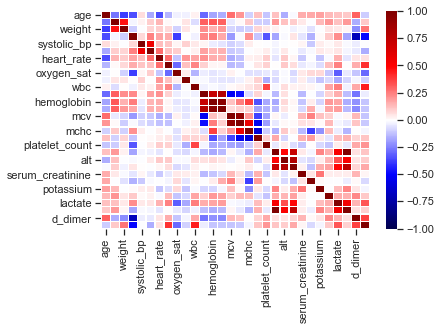

In [676]:
sns.heatmap(df.corr(),cmap='seismic',center=0,vmin=-1,vmax=1,linecolor='white',linewidths=.2)
plt.savefig('corr_heatmap.png', bbox_inches='tight')

In [614]:
dfj=df.drop([
       'smoke_hist', 'year_quit',
        'height','weight',
       'temp', 'motor', 'verbal', 'eye',
       'intubated', 'wbc', 'rbc', 'hemoglobin', 'hematocrit', 'mcv', 'mch',
       'mchc', 'rdw', 'platelet_count', 'pt', 'alt', 'ast', 'serum_creatinine',
       'sodium', 'potassium', 'total_serum_bilirubin', 'lactate', 'inr',
       'd_dimer', 'crp'],axis=1)

In [615]:
dfj.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 508 entries, 0 to 507
Data columns (total 11 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   reason                 508 non-null    object
 1   age                    508 non-null    int64 
 2   sex                    508 non-null    object
 3   comorb                 379 non-null    object
 4   er_2_weeks             508 non-null    object
 5   admission_disposition  508 non-null    object
 6   systolic_bp            508 non-null    int64 
 7   diastolic_bp           508 non-null    int64 
 8   heart_rate             508 non-null    int64 
 9   respiratory_rate       508 non-null    int64 
 10  oxygen_sat             508 non-null    int64 
dtypes: int64(6), object(5)
memory usage: 43.8+ KB


#### Now that we've cleaned the dataset we can go through and take the information discoverd to provide visuals and possibly newer discoveries

In [616]:
dfj.shape

(508, 11)

In [617]:
dfj.columns

Index(['reason', 'age', 'sex', 'comorb', 'er_2_weeks', 'admission_disposition',
       'systolic_bp', 'diastolic_bp', 'heart_rate', 'respiratory_rate',
       'oxygen_sat'],
      dtype='object')

In [618]:
dfj.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 508 entries, 0 to 507
Data columns (total 11 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   reason                 508 non-null    object
 1   age                    508 non-null    int64 
 2   sex                    508 non-null    object
 3   comorb                 379 non-null    object
 4   er_2_weeks             508 non-null    object
 5   admission_disposition  508 non-null    object
 6   systolic_bp            508 non-null    int64 
 7   diastolic_bp           508 non-null    int64 
 8   heart_rate             508 non-null    int64 
 9   respiratory_rate       508 non-null    int64 
 10  oxygen_sat             508 non-null    int64 
dtypes: int64(6), object(5)
memory usage: 43.8+ KB


In [619]:
dfj.describe()

,age,systolic_bp,diastolic_bp,heart_rate,respiratory_rate,oxygen_sat
count,508.000000,508.000000,508.000000,508.000000,508.000000,508.000000
mean,66.027559,129.362205,75.566929,97.397638,24.901575,93.100394
std,16.394160,22.051194,12.851352,17.513347,7.170656,6.102006
min,19.000000,85.000000,22.000000,41.000000,12.000000,47.000000
25%,55.750000,115.000000,68.000000,86.000000,20.000000,92.000000
50%,66.000000,127.000000,75.000000,98.000000,24.000000,94.000000
75%,78.000000,143.000000,83.000000,109.000000,28.000000,96.000000
max,100.000000,227.000000,145.000000,161.000000,59.000000,100.000000


#### Creating a dataset to view and analyze the potential amount of patients that may possible have afib through an example set of patients

#### Sorting

In [620]:
dfj.sort_values(by="age", ascending=False).head()

,reason,age,sex,comorb,er_2_weeks,admission_disposition,systolic_bp,diastolic_bp,heart_rate,respiratory_rate,oxygen_sat
373,Pneumonia,100,Male,Chronic cardiac disease,No,WARD,91,52,67,32,96
347,Respiratory failure,99,Male,Chronic cardiac disease,No,WARD,136,77,95,32,83
413,Hypoxemia,98,Male,None,No,WARD,154,79,82,18,92
390,Pneumonia,98,Female,Chronic cardiac disease,No,WARD,138,63,82,20,94
475,Hypoxemia,97,Female,"Asthma, Chronic cardiac disease",No,WARD,145,76,112,32,93


In [621]:
dfj.sort_values(by=["reason", "age"], ascending=[True, False]).head()

,reason,age,sex,comorb,er_2_weeks,admission_disposition,systolic_bp,diastolic_bp,heart_rate,respiratory_rate,oxygen_sat
371,Acute respiratory distress syndrome,78,Male,"Chronic cardiac disease, Diabetes",No,ICU,156,67,90,40,86
362,Acute respiratory distress syndrome,42,Male,None,Yes,WARD,120,86,112,26,94
165,COVID-19,97,Female,"Chronic cardiac disease, Diabetes",No,WARD,89,60,88,36,98
115,COVID-19,95,Male,Diabetes,No,WARD,169,80,74,22,94
293,COVID-19,95,Male,Chronic cardiac disease,Yes,WARD,146,89,110,28,92


#### Indexing and retrieving data

In [622]:
dfj["age"].mean()

66.0275590551181

#### Checking the amount inpatients above the age of 32 as Afib is neccessarily checked with older patients but when found with younger patients it's usually due to other heart conditions. Which would be nice to keep in mind when checking through respiratory illnesses tied with Covid or pneumonia

In [623]:
dfj[dfj["age"] <=32 ].count()

reason                   14
age                      14
sex                      14
comorb                    7
er_2_weeks               14
admission_disposition    14
systolic_bp              14
diastolic_bp             14
heart_rate               14
respiratory_rate         14
oxygen_sat               14
dtype: int64

In [624]:
np.max(dfj["heart_rate"])

161

In [625]:
dfj['heart_rate'].argmax()

504

##### So now we know which row has the max heart rate within the dataset of patient information we can check the other information for that row 
##### to see if there are any other factors that could overlap into potential Afib

In [626]:
Patient_0 = dfj.iloc[504]
Patient_0

reason                                            COVID-19
age                                                     81
sex                                                   Male
comorb                   Chronic cardiac disease, Diabetes
er_2_weeks                                             Yes
admission_disposition                                 WARD
systolic_bp                                            161
diastolic_bp                                            81
heart_rate                                             161
respiratory_rate                                        55
oxygen_sat                                              84
Name: 504, dtype: object

In [627]:
dfj['heart_rate'].argmin()

444

In [628]:
Patient_1 = dfj.iloc[444]
Patient_1

reason                                           Pneumonia
age                                                     79
sex                                                   Male
comorb                   Chronic cardiac disease, Diabetes
er_2_weeks                                              No
admission_disposition                                 WARD
systolic_bp                                             87
diastolic_bp                                            66
heart_rate                                              41
respiratory_rate                                        18
oxygen_sat                                             100
Name: 444, dtype: object

##### With the min and max heart rates being found and the patients tied to those rows we can fininsh creating a new dataset of test patients to analyze

In [629]:
Patient_2 = dfj.iloc[305]
Patient_2

reason                                           Pneumonia
age                                                     47
sex                                                   Male
comorb                   Chronic cardiac disease, Diabetes
er_2_weeks                                              No
admission_disposition                                 WARD
systolic_bp                                            112
diastolic_bp                                            81
heart_rate                                             117
respiratory_rate                                        20
oxygen_sat                                              96
Name: 305, dtype: object

In [630]:
Patient_3 = dfj.iloc[112]
Patient_3

reason                   COVID-19
age                            74
sex                        Female
comorb                     Asthma
er_2_weeks                     No
admission_disposition        WARD
systolic_bp                   113
diastolic_bp                   71
heart_rate                     84
respiratory_rate               20
oxygen_sat                     92
Name: 112, dtype: object

In [631]:
Patient_4 = dfj.iloc[53]
Patient_4

reason                   Pneumonia
age                             34
sex                           Male
comorb                        None
er_2_weeks                      No
admission_disposition         WARD
systolic_bp                    125
diastolic_bp                    70
heart_rate                     102
respiratory_rate                18
oxygen_sat                      96
Name: 53, dtype: object

In [632]:
Patient_5 = dfj.iloc[6]
Patient_5

reason                   COVID-19
age                            50
sex                          Male
comorb                       None
er_2_weeks                     No
admission_disposition        WARD
systolic_bp                   149
diastolic_bp                  100
heart_rate                    130
respiratory_rate               20
oxygen_sat                     94
Name: 6, dtype: object

In [633]:
Patient_6 = dfj.iloc[110]
Patient_6

reason                                  COVID-19
age                                           68
sex                                         Male
comorb                   Chronic cardiac disease
er_2_weeks                                    No
admission_disposition                       WARD
systolic_bp                                  127
diastolic_bp                                  90
heart_rate                                    89
respiratory_rate                              26
oxygen_sat                                    94
Name: 110, dtype: object

In [634]:
Patient_7 = dfj.iloc[201]
Patient_7

reason                                            COVID-19
age                                                     65
sex                                                   Male
comorb                   Chronic cardiac disease, Diabetes
er_2_weeks                                              No
admission_disposition                                 WARD
systolic_bp                                            126
diastolic_bp                                            80
heart_rate                                             108
respiratory_rate                                        24
oxygen_sat                                              94
Name: 201, dtype: object

In [635]:
Patient_8 = dfj.iloc[93]
Patient_8

reason                                 Pneumonia
age                                           76
sex                                         Male
comorb                   Chronic cardiac disease
er_2_weeks                                    No
admission_disposition                       WARD
systolic_bp                                  115
diastolic_bp                                  57
heart_rate                                   112
respiratory_rate                              28
oxygen_sat                                    96
Name: 93, dtype: object

In [636]:
Patient_9 = dfj.iloc[84]
Patient_9

reason                                  COVID-19
age                                           62
sex                                         Male
comorb                   Chronic cardiac disease
er_2_weeks                                    No
admission_disposition                       WARD
systolic_bp                                  108
diastolic_bp                                  66
heart_rate                                    72
respiratory_rate                              22
oxygen_sat                                    92
Name: 84, dtype: object

In [637]:
Patient_10 = dfj.iloc[150]
Patient_10

reason                   COVID-19
age                            39
sex                          Male
comorb                     Asthma
er_2_weeks                     No
admission_disposition        WARD
systolic_bp                   125
diastolic_bp                   82
heart_rate                    102
respiratory_rate               28
oxygen_sat                     97
Name: 150, dtype: object

In [638]:
Patient_11 = dfj.iloc[300]
Patient_11

reason                   Pneumonia
age                             40
sex                         Female
comorb                        None
er_2_weeks                      No
admission_disposition         WARD
systolic_bp                     99
diastolic_bp                    68
heart_rate                     109
respiratory_rate                38
oxygen_sat                      90
Name: 300, dtype: object

In [639]:
Patient_12 = dfj.iloc[26]
Patient_12

reason                   COVID-19
age                            33
sex                          Male
comorb                       None
er_2_weeks                     No
admission_disposition        WARD
systolic_bp                   126
diastolic_bp                   83
heart_rate                    101
respiratory_rate               22
oxygen_sat                     96
Name: 26, dtype: object

In [640]:
Patient_13 = dfj.iloc[14]
Patient_13

reason                                                            COVID-19
age                                                                     58
sex                                                                 Female
comorb                   Chronic cardiac disease, Chronic pulmonary dis...
er_2_weeks                                                              No
admission_disposition                                                 WARD
systolic_bp                                                            142
diastolic_bp                                                           101
heart_rate                                                             102
respiratory_rate                                                        24
oxygen_sat                                                              96
Name: 14, dtype: object

In [641]:
Patient_14 = dfj.iloc[299]
Patient_14

reason                                                       Fever
age                                                             76
sex                                                         Female
comorb                   Asthma, Chronic cardiac disease, Diabetes
er_2_weeks                                                      No
admission_disposition                                         WARD
systolic_bp                                                    121
diastolic_bp                                                    79
heart_rate                                                     104
respiratory_rate                                                21
oxygen_sat                                                      95
Name: 299, dtype: object

In [642]:
Patient_15 = dfj.iloc[71]
Patient_15

reason                                  COVID-19
age                                           63
sex                                       Female
comorb                   Chronic cardiac disease
er_2_weeks                                    No
admission_disposition                       WARD
systolic_bp                                  137
diastolic_bp                                  59
heart_rate                                    97
respiratory_rate                              28
oxygen_sat                                    96
Name: 71, dtype: object

In [643]:
Patient_16 = dfj.iloc[55]
Patient_16

reason                                     Cough
age                                           77
sex                                       Female
comorb                   Chronic cardiac disease
er_2_weeks                                   Yes
admission_disposition                       WARD
systolic_bp                                  175
diastolic_bp                                  91
heart_rate                                    71
respiratory_rate                              18
oxygen_sat                                    97
Name: 55, dtype: object

In [644]:
Patient_17 = dfj.iloc[421]
Patient_17

reason                   Pneumonia due to COVID-19
age                                             36
sex                                         Female
comorb                                        None
er_2_weeks                                     Yes
admission_disposition                         WARD
systolic_bp                                    127
diastolic_bp                                    76
heart_rate                                     128
respiratory_rate                                42
oxygen_sat                                      95
Name: 421, dtype: object

In [645]:
Patient_18 = dfj.iloc[507]
Patient_18

reason                   COVID-19
age                            73
sex                          Male
comorb                       None
er_2_weeks                    Yes
admission_disposition        WARD
systolic_bp                   121
diastolic_bp                   76
heart_rate                     86
respiratory_rate               24
oxygen_sat                     98
Name: 507, dtype: object

In [646]:
Patient_19 = dfj.iloc[476]
Patient_19

reason                                 Shortness of breath
age                                                     57
sex                                                 Female
comorb                   Chronic cardiac disease, Diabetes
er_2_weeks                                              No
admission_disposition                                  ICU
systolic_bp                                            122
diastolic_bp                                            53
heart_rate                                              47
respiratory_rate                                        36
oxygen_sat                                              47
Name: 476, dtype: object

In [647]:
Patient_20 = dfj.iloc[500]
Patient_20

reason                                                           Pneumonia
age                                                                     57
sex                                                                   Male
comorb                   Asthma, Chronic cardiac disease, Chronic pulmo...
er_2_weeks                                                             Yes
admission_disposition                                                 WARD
systolic_bp                                                            142
diastolic_bp                                                            78
heart_rate                                                              90
respiratory_rate                                                        24
oxygen_sat                                                              95
Name: 500, dtype: object

In [648]:
Patients = Patient_0,Patient_1,Patient_2,Patient_3,Patient_4,Patient_5,Patient_6,Patient_7,Patient_8,Patient_9,Patient_10,Patient_11,Patient_12,Patient_13,Patient_14,Patient_15,Patient_16,Patient_17,Patient_18,Patient_19,Patient_20

In [649]:
Patient = pd.DataFrame(Patients)

In [650]:
Patient.describe()

,age,systolic_bp,diastolic_bp,heart_rate,respiratory_rate,oxygen_sat
count,21.000000,21.000000,21.000000,21.000000,21.000000,21.000000
mean,59.285714,126.666667,76.571429,97.761905,26.476190,92.380952
std,16.081489,19.885506,12.812382,26.929361,9.276956,10.897138
min,33.000000,87.000000,53.000000,41.000000,18.000000,47.000000
25%,47.000000,115.000000,68.000000,86.000000,20.000000,94.000000
50%,62.000000,125.000000,78.000000,102.000000,24.000000,95.000000
75%,74.000000,137.000000,82.000000,109.000000,28.000000,96.000000
max,81.000000,175.000000,101.000000,161.000000,55.000000,100.000000


### Visualizations

##### Making the Correlation Table and Heatmap:

In [651]:
Patient.corr()

,age,systolic_bp,diastolic_bp,heart_rate,respiratory_rate,oxygen_sat
age,1.000000,0.122894,-0.091590,-0.223820,-0.024753,-0.000082
systolic_bp,0.122894,1.000000,0.545567,0.368749,0.177077,-0.015075
diastolic_bp,-0.091590,0.545567,1.000000,0.369368,-0.188337,0.397666
heart_rate,-0.223820,0.368749,0.369368,1.000000,0.491825,0.247042
respiratory_rate,-0.024753,0.177077,-0.188337,0.491825,1.000000,-0.429711
oxygen_sat,-0.000082,-0.015075,0.397666,0.247042,-0.429711,1.000000


##### Heatmap

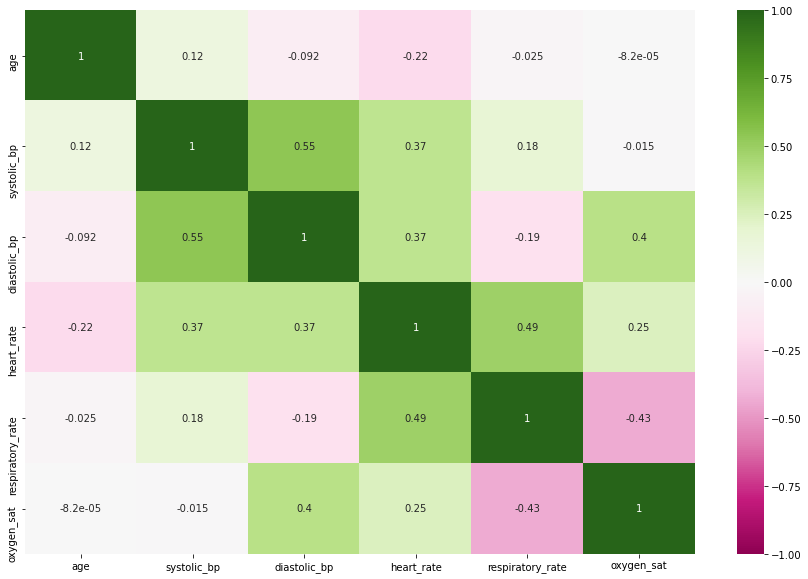

In [652]:
fig=plt.figure(figsize=(15,10))
heat_map=Patient.corr(method='pearson')
axis=sns.heatmap(heat_map, annot=True, center=0, vmax=1,vmin=-1,cmap='PiYG')
plt.savefig('heatmap.png', bbox_inches='tight')

In [675]:
plt.savefig?

##### Getting Distributions:

In [654]:
Patient.describe()

,age,systolic_bp,diastolic_bp,heart_rate,respiratory_rate,oxygen_sat
count,21.000000,21.000000,21.000000,21.000000,21.000000,21.000000
mean,59.285714,126.666667,76.571429,97.761905,26.476190,92.380952
std,16.081489,19.885506,12.812382,26.929361,9.276956,10.897138
min,33.000000,87.000000,53.000000,41.000000,18.000000,47.000000
25%,47.000000,115.000000,68.000000,86.000000,20.000000,94.000000
50%,62.000000,125.000000,78.000000,102.000000,24.000000,95.000000
75%,74.000000,137.000000,82.000000,109.000000,28.000000,96.000000
max,81.000000,175.000000,101.000000,161.000000,55.000000,100.000000


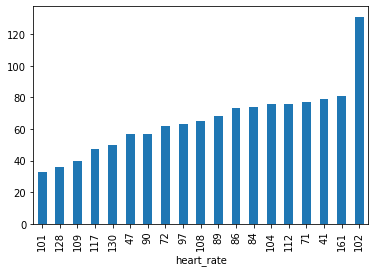

In [655]:
Patient.groupby('heart_rate')['age'].sum().sort_values().plot(kind='bar')
plt.savefig('heart_rate_age.png', bbox_inches='tight')

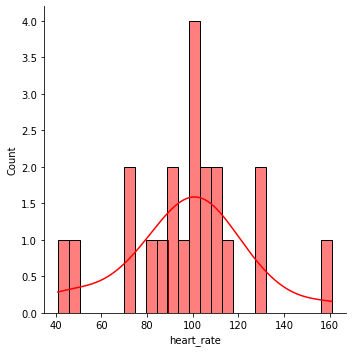

In [656]:
sns.displot(Patient.heart_rate,color='red', bins=25,kde=True)
plt.savefig('kde_heart_rate.png', bbox_inches='tight')

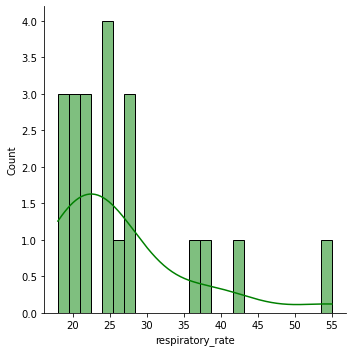

In [657]:
sns.displot(Patient.respiratory_rate ,color='green', bins=25,kde=True)
plt.savefig('kde_respiratory_rate.png', bbox_inches='tight')

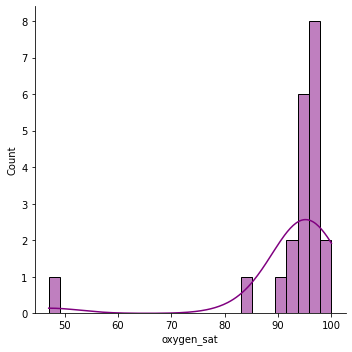

In [658]:
sns.displot(Patient['oxygen_sat'],color='purple', bins=25,kde=True)
plt.savefig('kde_oxygen_sat.png', bbox_inches='tight')

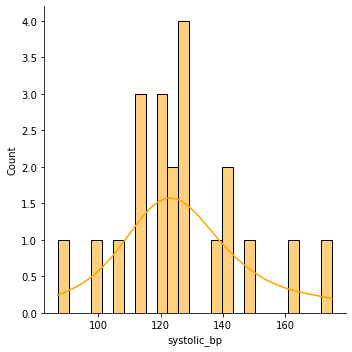

In [659]:
sns.displot(Patient['systolic_bp'],color='orange', bins=25,kde=True)
plt.savefig('kde_systolic_bp.png', bbox_inches='tight')

##### Forming a scattplot showcasing Age/Oxygen_Saturation in High_Chance_of_Afib vs Low_Chance_of_Afib.

In [660]:
High_Chance_of_Afib = Patient.query("heart_rate >= 60")
Low_Chance_of_Afib = Patient.query("heart_rate <= 60")

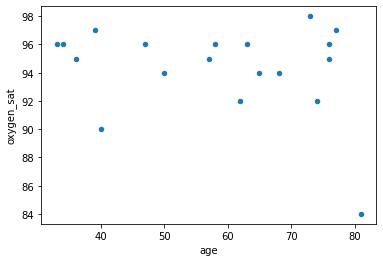

In [661]:
High_Chance_of_Afib.plot.scatter(x="age",y="oxygen_sat")
plt.savefig('High_Chance_of_Afib.png', bbox_inches='tight')

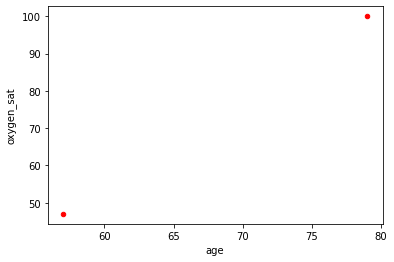

In [662]:
Low_Chance_of_Afib.plot.scatter(x="age",y="oxygen_sat", color = 'red')
plt.savefig('Low_Chance_of_Afib.png', bbox_inches='tight')

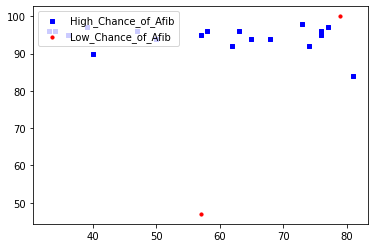

In [663]:
fig1 = plt.figure()
ax1 = fig1.add_subplot(111)

ax1.scatter(High_Chance_of_Afib['age'], High_Chance_of_Afib['oxygen_sat'],s=10, c='b', marker="s", label='High_Chance_of_Afib')
ax1.scatter(Low_Chance_of_Afib['age'],Low_Chance_of_Afib['oxygen_sat'], s=10, c='r', marker="o", label='Low_Chance_of_Afib')
plt.legend(loc='upper left');
plt.savefig('HighChance_vs_LowChance.png', bbox_inches='tight')
plt.show()


##### Scattplot of systolic_blood_pressure vs Heart_rate

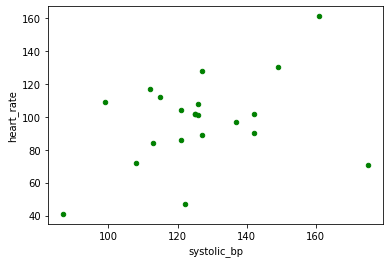

In [664]:
Patient.plot.scatter(x="systolic_bp",y="heart_rate", color="green")
plt.savefig('Patient_stolic_bp_heart_rate.png', bbox_inches='tight')

##### Heart_Rate Boxplot

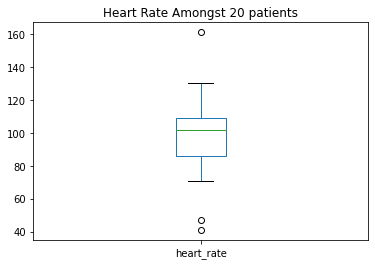

In [665]:
bxt = Patient.boxplot(column = 'heart_rate')
bxt.set_title('Heart Rate Amongst 20 patients')
bxt.grid(False)
plt.savefig('Heart Rate Amongst 20 patients.png', bbox_inches='tight')

##### Admission and comorbidities Bargraphs

In [666]:
Admission = Patient['reason'].groupby(Patient['reason']).count()
Admission

reason
COVID-19                     11
Cough                         1
Fever                         1
Pneumonia                     6
Pneumonia due to COVID-19     1
Shortness of breath           1
Name: reason, dtype: int64

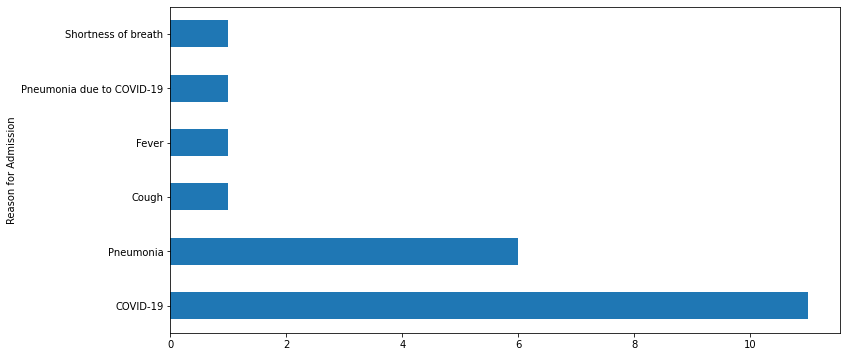

In [667]:
Admission.sort_values(ascending=False).plot(kind="barh",ylabel="Amount of Admissions",xlabel='Reason for Admission',figsize=(12,6))
plt.savefig('Admission_AmountvsReason.png', bbox_inches='tight')

In [668]:
Known_Illness = Patient['comorb'].groupby(Patient['comorb']).count()
Known_Illness

comorb
Asthma                                                                  2
Asthma, Chronic cardiac disease, Chronic pulmonary disease, Diabetes    1
Asthma, Chronic cardiac disease, Diabetes                               1
Chronic cardiac disease                                                 5
Chronic cardiac disease, Chronic pulmonary disease                      1
Chronic cardiac disease, Diabetes                                       5
Name: comorb, dtype: int64

##### Known Illness besides Admission reason Pie Chart 

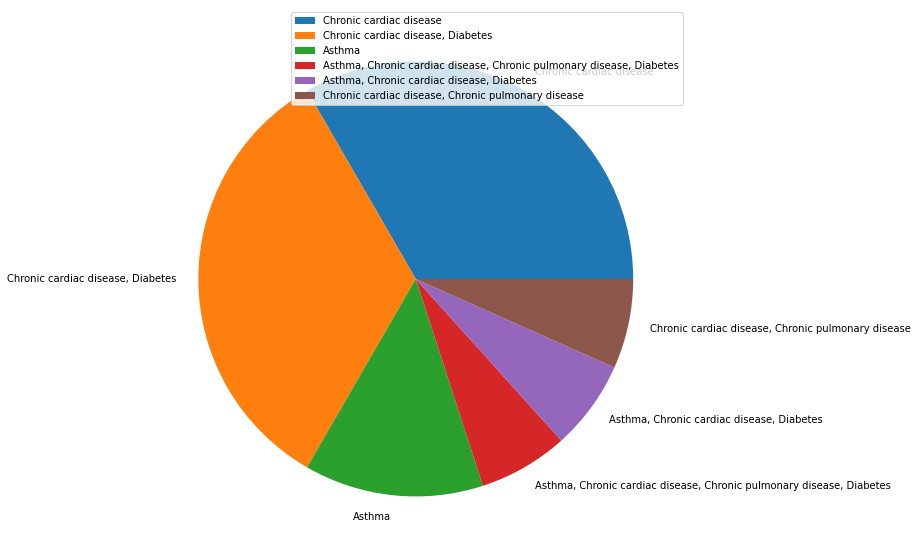

In [669]:
Known_Illness.sort_values(ascending=False).plot(kind="pie",ylabel="",xlabel='Illness',figsize=(20,10)),plt.legend(loc='best')
plt.savefig('Known_Illness_Outside Admission.png', bbox_inches='tight')

##### Pair Plot

In [670]:
Patient

,reason,age,sex,comorb,er_2_weeks,admission_disposition,systolic_bp,diastolic_bp,heart_rate,respiratory_rate,oxygen_sat
504,COVID-19,81,Male,"Chronic cardiac disease, Diabetes",Yes,WARD,161,81,161,55,84
444,Pneumonia,79,Male,"Chronic cardiac disease, Diabetes",No,WARD,87,66,41,18,100
305,Pneumonia,47,Male,"Chronic cardiac disease, Diabetes",No,WARD,112,81,117,20,96
112,COVID-19,74,Female,Asthma,No,WARD,113,71,84,20,92
53,Pneumonia,34,Male,None,No,WARD,125,70,102,18,96
6,COVID-19,50,Male,None,No,WARD,149,100,130,20,94
110,COVID-19,68,Male,Chronic cardiac disease,No,WARD,127,90,89,26,94
201,COVID-19,65,Male,"Chronic cardiac disease, Diabetes",No,WARD,126,80,108,24,94
93,Pneumonia,76,Male,Chronic cardiac disease,No,WARD,115,57,112,28,96
84,COVID-19,62,Male,Chronic cardiac disease,No,WARD,108,66,72,22,92


Had some strange errors here. I traced the problem back to some of the values of the hues only being present in one row of the Patient dataframe.

In [671]:
Patient.reason.groupby(Patient.reason).count()

reason
COVID-19                     11
Cough                         1
Fever                         1
Pneumonia                     6
Pneumonia due to COVID-19     1
Shortness of breath           1
Name: reason, dtype: int64

C:\Users\natal\anaconda3\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
C:\Users\natal\anaconda3\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
C:\Users\natal\anaconda3\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
C:\Users\natal\anaconda3\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
C:\Users\natal\anaconda3\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
C:\Users\natal\anaconda3\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnin

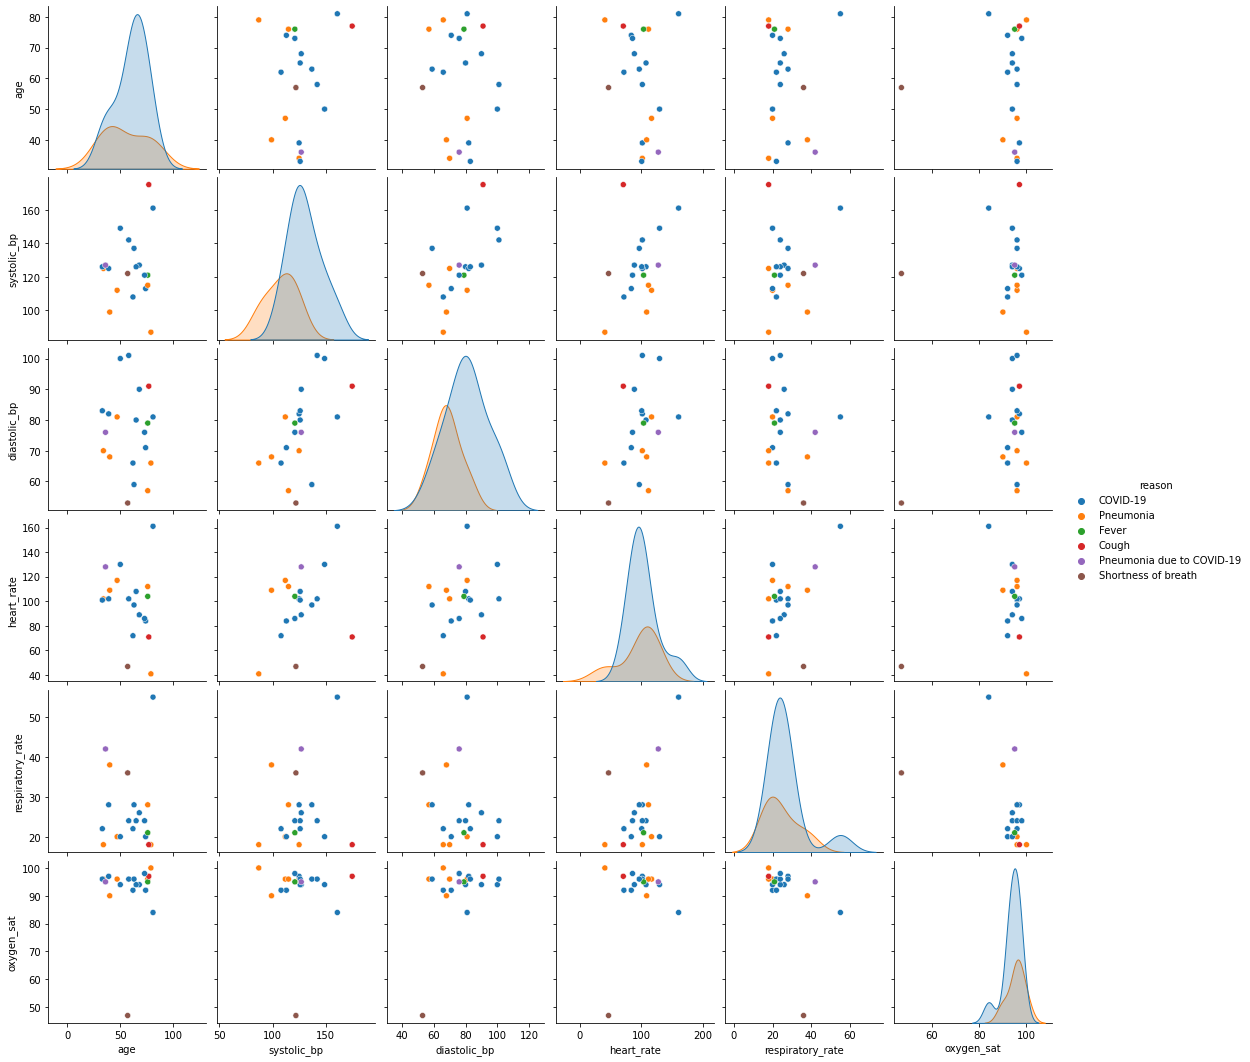

In [672]:
pair_plot=sns.pairplot(Patient[0:20], hue="reason")
plt.savefig('Patient and Reason.png', bbox_inches='tight')

In [673]:
Patient.comorb.groupby(Patient.comorb).count()

comorb
Asthma                                                                  2
Asthma, Chronic cardiac disease, Chronic pulmonary disease, Diabetes    1
Asthma, Chronic cardiac disease, Diabetes                               1
Chronic cardiac disease                                                 5
Chronic cardiac disease, Chronic pulmonary disease                      1
Chronic cardiac disease, Diabetes                                       5
Name: comorb, dtype: int64

C:\Users\natal\anaconda3\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
C:\Users\natal\anaconda3\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
C:\Users\natal\anaconda3\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
C:\Users\natal\anaconda3\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
C:\Users\natal\anaconda3\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
C:\Users\natal\anaconda3\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnin

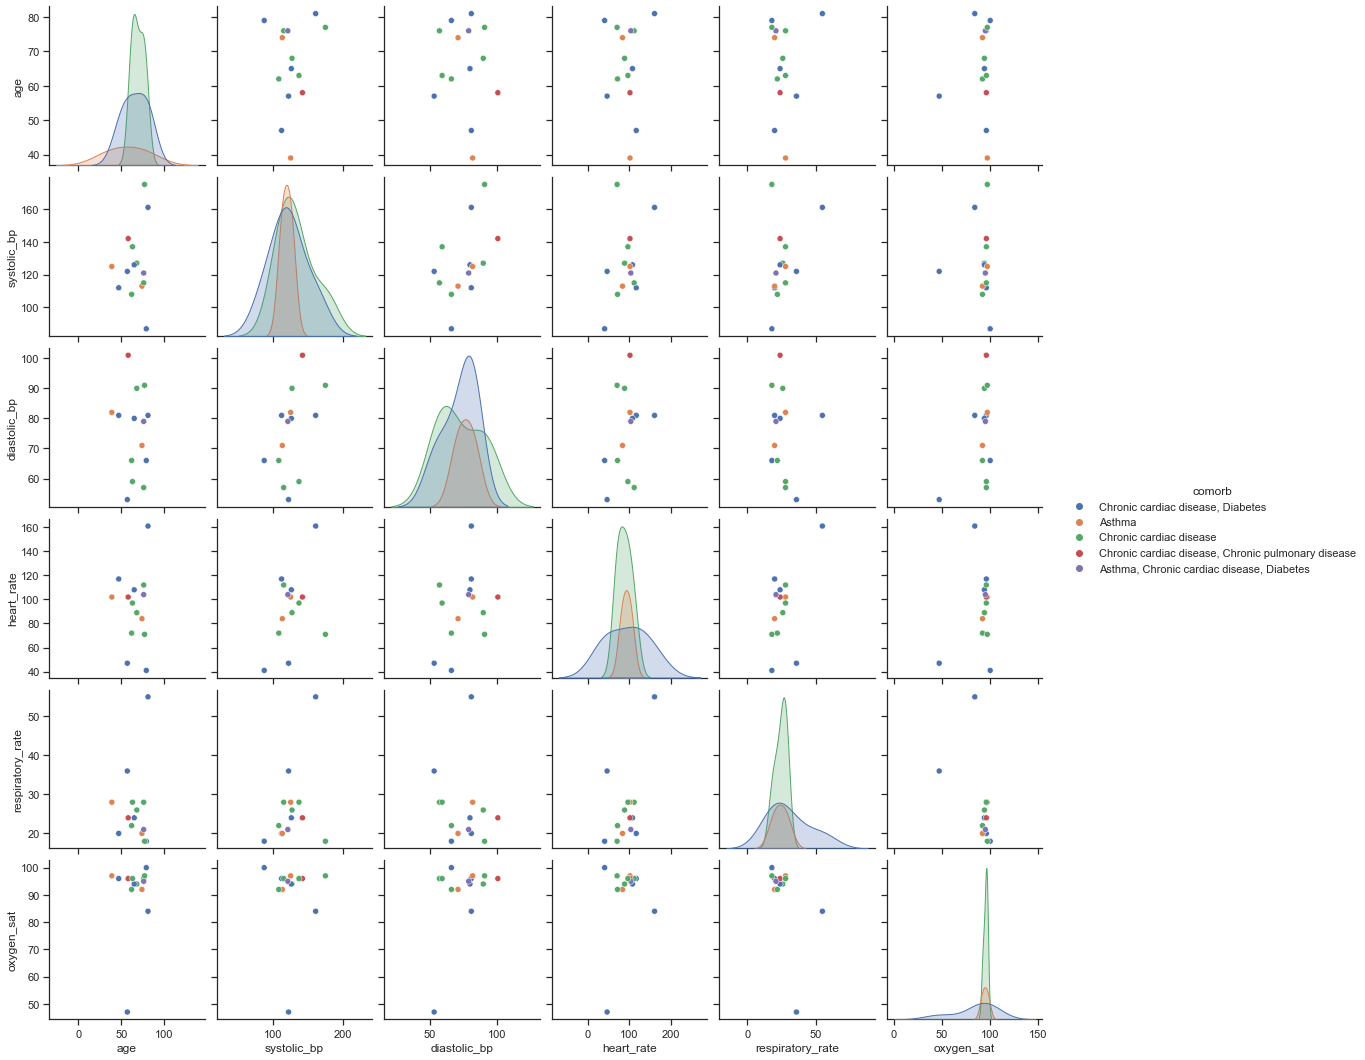

In [674]:
sns.set(style="ticks", color_codes=True)
sns.pairplot(Patient[0:20], hue='comorb')
plt.savefig('Patient and Comorb.png', bbox_inches='tight')